#**Project -**

<img src="https://drive.google.com/uc?export=view&id=197of_C8rCNh1OzegJabvpFkTJtGgcBMP" width="800px">

##**Project Profile -**

###**Project Name** - Google Play Store App Analysis

#####**Project Type** - EDA
#####**Project Mode** - Individual Project
#####**Project Performed By** - Satyajeet Ghosh
#####**Role** - Student
#####**Trainer** - Nisha Jaiswal
#####**Training Program** - Data Analytics (No + Low Code)
#####**Organization** - Anudip Foundation

#####**Last Updated:** 8 July 2025

##**Project Summary -**

####The **Google Play Store App Analysis** project involves exploring a dataset of mobile applications listed on the Google Play Store. The dataset contains important information about each app, such as its name, category, rating, number of reviews, size, installs, price, content rating, genre, last update date, and required Android version.

This project aims to discover patterns and insights that can help understand how apps are developed, categorized, and received by users. It serves as a real-world example of how data analytics can help make informed decisions in the mobile app industry.

####Key Areas of Analysis:

- **App Categories:** Identify which categories have the most apps and which are most popular among users.
- **Ratings & Reviews:** Understand how user feedback varies across apps and what the average rating trends are.
- **Installs:** Analyze how many apps have been downloaded and identify apps with the highest user base.
- **Free vs Paid Apps:** Compare how free apps perform compared to paid ones in terms of installs and ratings.
- **Pricing Distribution:** Study the range and frequency of paid apps and their pricing strategies.
- **Content Ratings:** Check which types of audiences the apps are targeting (e.g., Everyone, Teen, Mature).
- **Size of Apps:** Observe trends in app size and its potential effect on downloads and ratings.
- **Last Updated:** Analyze how frequently apps are updated and which categories keep their apps up to date.
- **Genres:** Explore the distribution of app genres and the most common genre types.

This analysis helps in understanding both user preferences and developer strategies on the Google Play Store. The project is performed individually by **Satyajeet Ghosh** as the final project for the **Data Analytics (No + Low Code)** training program under the guidance of **Nisha Jaiswal ma'am**.

##**GitHub Link -**

https://github.com/Satyajeet-5/data-analytics-googleplaystore-project/tree/main

##**Problem Statement -**

###With millions of mobile applications available on the Google Play Store, it becomes challenging to understand which types of apps perform well, how users rate them, and what factors contribute to an app’s popularity and success.

###There is a need to analyze and extract meaningful insights from app-related data to identify trends in user preferences, pricing strategies, update frequency, and content targeting.

###The goal of this project is to perform an in-depth analysis of Google Play Store app data to answer key business and user behavior questions. This will help developers, marketers, and analysts make data-driven decisions in the mobile app market.

##**Let's Start !**

####**1. Data Extraction**

######**Mounting Drive**

In [45]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


######**Install and Import Libraries**

In [46]:
#install MySQL connectivity library
!pip install mysql-connector-python

In [47]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import mysql.connector
import requests

######**Extract DataSet**

In [48]:
# Extract data from remote database
def connection():
    conn = mysql.connector.connect(
        host="mysql-satyajeet.alwaysdata.net",
        user="satyajeet",
        password="8709862845",
        port=3306,
        database="satyajeet_attendance"
    )
    return conn

conn=connection()
cursor = conn.cursor()
cursor = conn.cursor(dictionary=True)
cursor.execute("SELECT * FROM googleplaystore LIMIT 1000")
rows = cursor.fetchall()
#get 1-1000 records
df1 = pd.DataFrame(rows)
print(df1.shape)

(1000, 13)


In [49]:
# Extract data from api
url = "https://googleplaystore.pythonanywhere.com/fetch"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    #get 1001-2000 records
    df2 = pd.DataFrame(data)

    display(df2.shape)
else:
    print("Failed to fetch data:", response.text)

(1000, 13)

In [50]:
# Extract data from Google drive
df3_path = '/content/drive/My Drive/googleplay_2000_4999.csv'
# get 2001-5000 records
df3 = pd.read_csv(df3_path)

# Extract data from GitHub
df4_path = 'https://raw.githubusercontent.com/Satyajeet-5/data-analytics-googleplaystore-project/main/googleplaystore_5001_8000.xlsx'
# get 5001-8000 records
df4 = pd.read_excel(df4_path)  # add engine explicitly

# Extract data from DropBox
df5_path = 'https://www.dropbox.com/scl/fi/sk7fe9mzm9rrbakz5vvnr/googleplaystore_8001_10841.csv?rlkey=qslq5sg9q8yn7wneko2quhk7c&st=w076ugjz&dl=1'
# get 8001-10841 records
df5 = pd.read_csv(df5_path)

print(df3.shape)
print(df4.shape)
print(df5.shape)

(3000, 13)
(3000, 13)
(2841, 13)


In [56]:
#Combined all sub dataframe to a single dataframe
df = pd.concat([df1,df2,df3, df4, df5], ignore_index=True)

######**Rows and Columns**

In [57]:
#Check how many rows and columns in dataset
print("Numbers of rows :",df.shape[0])
print("Numbers of columns :",df.shape[1])

Numbers of rows : 10841
Numbers of columns : 13


######**Display Dataset metadata**

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


######**Display numerical column or variable summarize**

In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


######**Display First 10 records**

In [ ]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


######**Display last 10 records**

In [ ]:
df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


####**2. Data Cleaning**

######**Records Duplicacy**

In [59]:
#Check how many duplicate records
print(f"Duplicate records are {df.duplicated().sum()} out of {df.shape[0]} records")

Duplicate records are 458 out of 10841 records


In [60]:
#Remove duplicate records
df.drop_duplicates(inplace=True)

#Reset the index to view the unique records
df.reset_index()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10378,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10379,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10380,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10381,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [61]:
#Check how many rows and columns in dataset after removing Duplicate
print("Numbers of rows :",df.shape[0])
print("Numbers of columns :",df.shape[1])

Numbers of rows : 10383
Numbers of columns : 13


######**Missing Value**

In [62]:
#Check how many missing value
print("Missing Value in each columns are")
print(df.isnull().sum())

#Sum of all missing values
total_missing=0
for col in df.columns:
    total_missing = total_missing + df[col].isnull().sum()

print(f"\n Total missing values are {total_missing}")

Missing Value in each columns are
App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

 Total missing values are 1478


In [63]:
#Remove missing value records
df.dropna(inplace=True)

#Reset the index to view the non-missing value records
df.reset_index()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8906,10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8907,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
8908,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
8909,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [64]:
#Again check how many missing value
print("Missing Value in each columns are")
print(df.isnull().sum())

#Sum of all missing values
total_missing=0
for col in df.columns:
    total_missing = total_missing + df[col].isnull().sum()

print(f"\n Total missing values are {total_missing}")

Missing Value in each columns are
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

 Total missing values are 0


In [65]:
#Check how many rows and columns in dataset after removing missing value records
print("Numbers of rows :",df.shape[0])
print("Numbers of columns :",df.shape[1])

Numbers of rows : 8911
Numbers of columns : 13


In [66]:
#Display unique values in each columns
for col in df.columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print('-' * 50)

Unique values in column 'App':
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Fr. Mike Schmitz Audio Teachings' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
--------------------------------------------------
Unique values in column 'Category':
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
--------------------------------------------------
Unique values in column 'Rating':
[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 4.  4.8 4.9 3.6 3.7 3.2 3.3 3.4 3.5
 3.1 5.  2

####**3. Data Transformation**

######**Convert column size to float type and removing the alphabet**

In [67]:
def size_to_mb(x):
    if isinstance(x, str):
        if x.endswith("M"):
            return float(x[:-1])
        if x.endswith("k"):
            return float(x[:-1].replace(",", "")) / 1024
    return 0.0

df["Size"] = df["Size"].apply(size_to_mb)
df["Size"]

,Size
0,19.0
1,14.0
2,8.7
3,25.0
4,2.8
...,...
10834,2.6
10836,53.0
10837,3.6
10839,0.0


######**Datatype conversion of review and last_updated column**

In [68]:
df["Reviews"]=df["Reviews"].astype(float)
df["Last_Updated"] = pd.to_datetime(df["Last_Updated"], errors="coerce")

######**Datatype conversion of column installs to float and replace the character**

In [69]:
def install_convert(x):
    if isinstance(x, str):
         x = x.replace(',', '').replace('+', '')
         return float(x)
    return 0.0

df["Installs"]= df["Installs"].apply(install_convert)
df["Installs"]

,Installs
0,10000.0
1,500000.0
2,5000000.0
3,50000000.0
4,100000.0
...,...
10834,500.0
10836,5000.0
10837,100.0
10839,1000.0


######**Convert column price to float and removing the characters**

In [ ]:

df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.strip()
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = df['Price'].astype(float)

####**4. Data Visualization**

In [ ]:
#create a custom color scale or strip between 0 to 1
google_colors = ["#4285F4", "#34A853", "#FBBC05", "#EA4335"]
google_gradient = LinearSegmentedColormap.from_list("google_gradient", google_colors)

######**<font color="red" >Chart - 1</font>**

<b><font color="blue" size="3">Question no. 1  How many apps are there in each Google Play Store category (and which categories have the most or fewest apps)?</font></b>

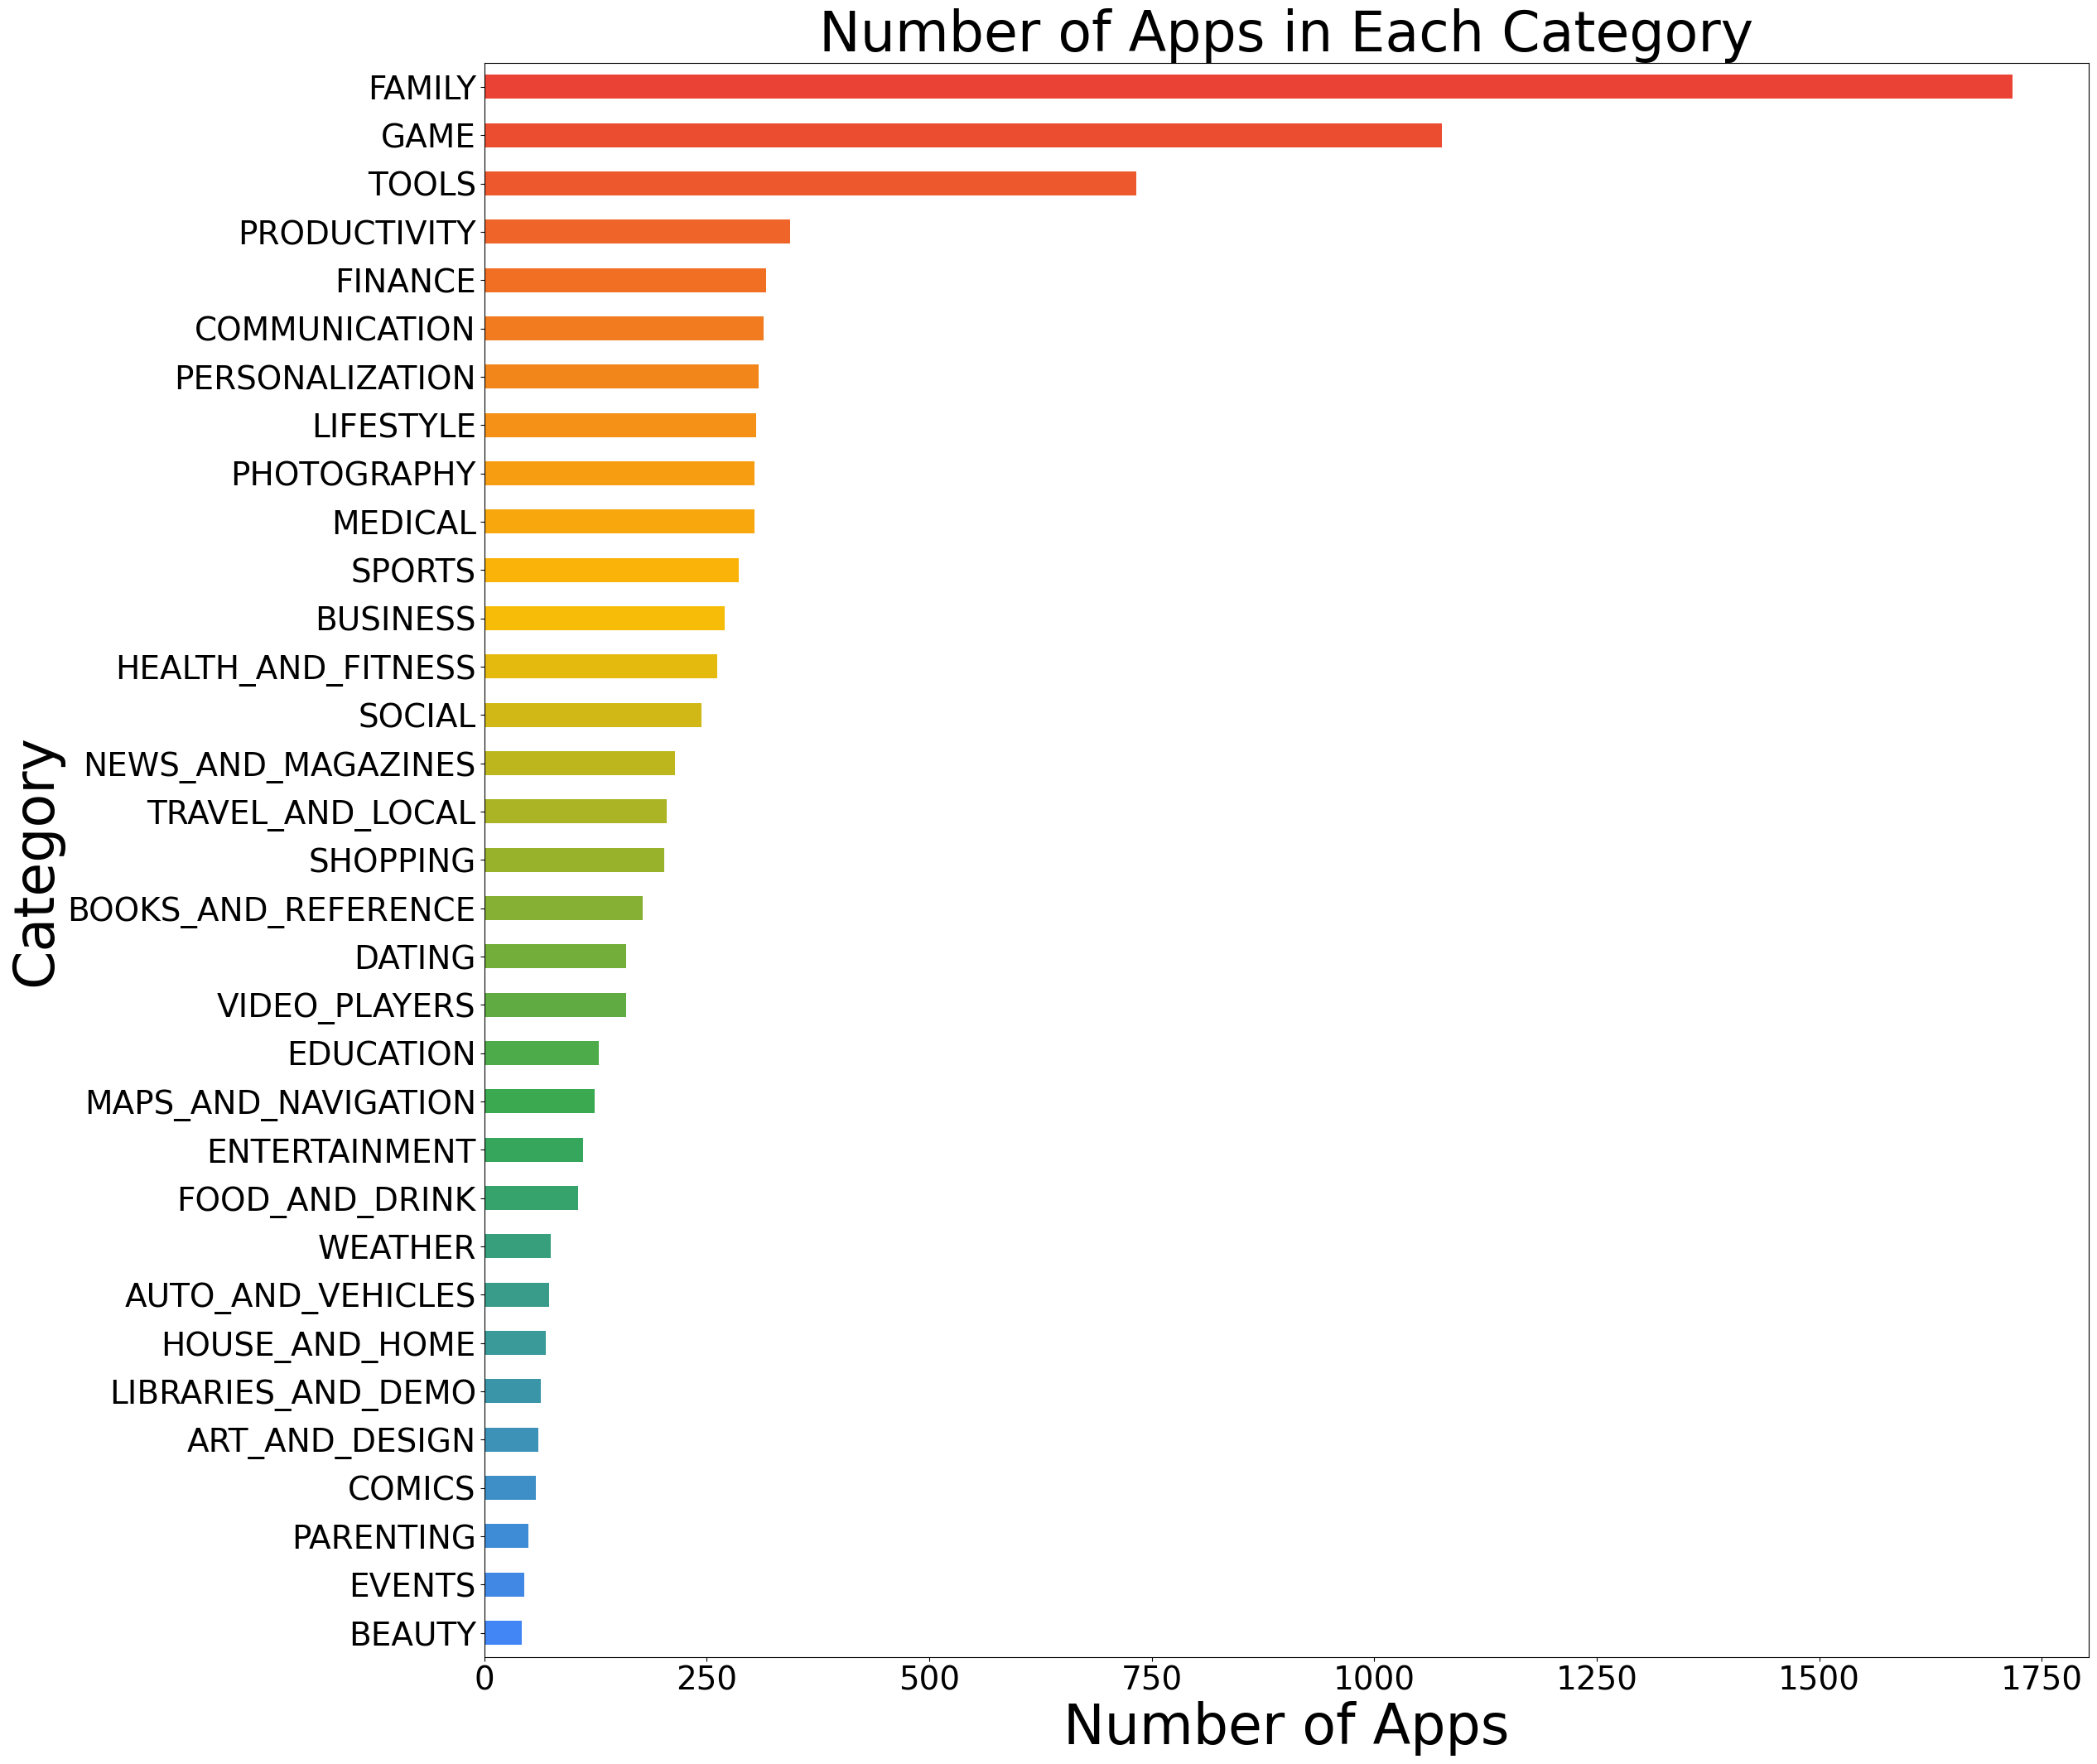

In [ ]:

apps_per_cat = df["Category"].value_counts().sort_values()

categories = list(apps_per_cat.index)
total = len(categories) - 1
colors = [google_gradient(i / total) for i in range(len(categories))]

plt.figure(figsize=(25, 25))
apps_per_cat.plot(kind="barh", color=colors)

plt.title("Number of Apps in Each Category",fontsize=48)
plt.xlabel("Number of Apps" ,fontsize=48)
plt.ylabel("Category",fontsize=48)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.show()

<b><font color="green" size="3">1. Why did you pick the specific chart?</font></b>

  <font color="#DAA520">A horizontal bar chart clearly displays long category names and makes it easier to compare the number of apps in each category visually.</font>

<b><font color="green" size="3">2. What is/are the insight(s) found from the chart?</font></b>

   <font color="#DAA520">The "FAMILY" category has the highest number of apps, followed by "GAME" and "TOOLS", while categories like "BEAUTY" and "PARENTING" have very few apps.</font>

<b><font color="green" size="3">3. Will the gained insights help creating a positive business impact?<br>
Are there any insights that lead to negative growth?</font></b>

   <font color="#DAA520">Yes, identifying less crowded categories like "BEAUTY" provides opportunities for app developers to target low-competition niches. Overcrowded categories may lead to negative growth due to high competition and lower visibility.</font>

######**<font color="red" >Chart - 2</font>**

<b><font color="blue" size="3">Question no. 2  How are Google Play Store app ratings distributed across the 0 – 5 scale (i.e., how many apps fall into each rating interval)?</font></b>

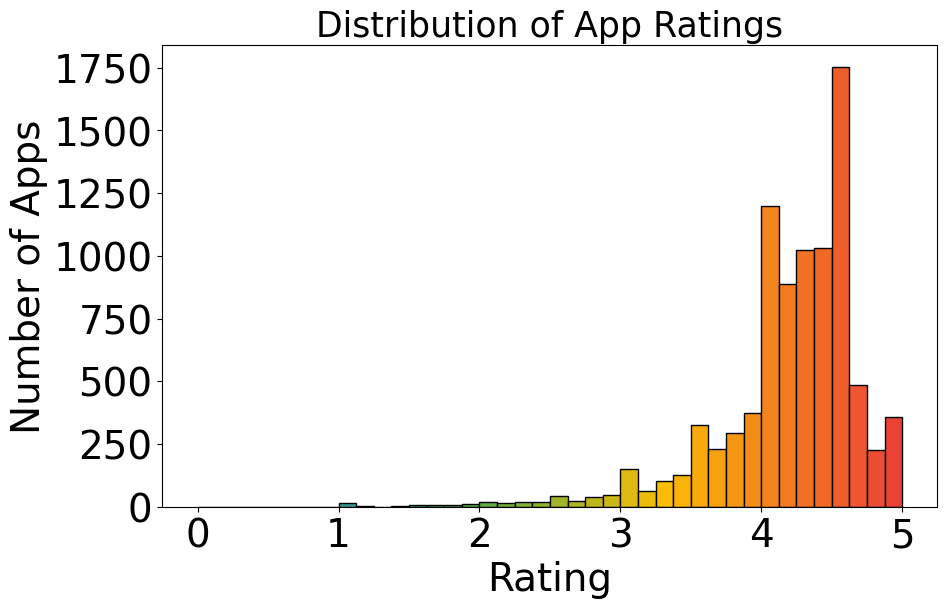

In [ ]:

ratings = df['Rating']

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(ratings, bins=40, range=(0, 5), edgecolor='black')

for i in range(len(patches)):
    patch = patches[i]
    patch.set_facecolor(google_gradient(i / (len(patches) - 1)))

plt.title('Distribution of App Ratings',fontsize=25)
plt.xlabel('Rating',fontsize=28)
plt.ylabel('Number of Apps',fontsize=28)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.show()

<b><font color="green" size="3">1. Why did you pick the specific chart?</font></b><br>

<font color="#DAA520">A histogram was chosen because it effectively shows the distribution of app ratings, especially for continuous numerical values like ratings from 0 to 5.</font>

<b><font color="green" size="3">2. What is/are the insight(s) found from the chart?</font></b><br>

<font color="#DAA520">Most apps have ratings between 4.0 and 5.0, with a noticeable peak near 4.5, indicating that users generally give high ratings.</font>

<b><font color="green" size="3">3. Will the gained insights help create a positive business impact?<br>
Are there any insights that lead to negative growth?</font></b><br>

<font color="#DAA520" size="3">
Yes, the high average ratings can positively impact app downloads by building user trust. However, apps with lower ratings (<3.0) might indicate poor user experience, leading to negative growth if not improved.</font>

######**<font color="red" >Chart - 3</font>**

<b><font color="blue" size="3">Question no. 3  Which content rating category dominates the Google Play Store?</font></b>

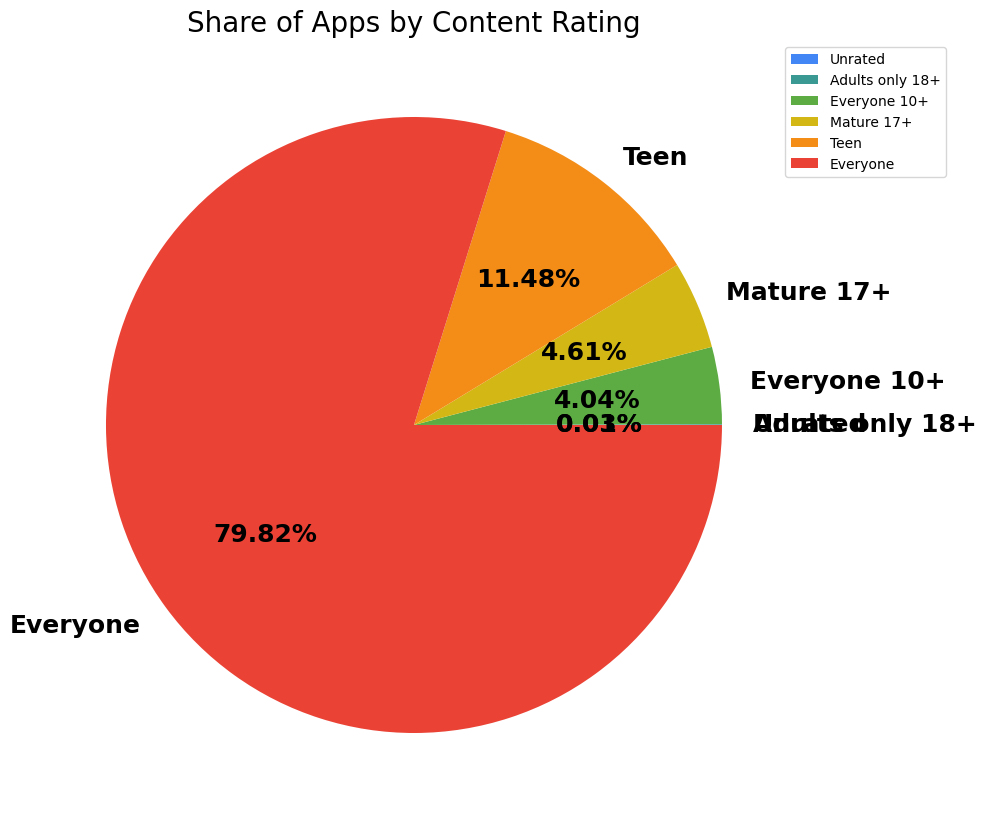

In [ ]:

content_counts = df["Content_Rating"].value_counts().sort_values()

ratings = list(content_counts.index)
total = len(ratings) - 1
colors = [google_gradient(i / total) for i in range(len(ratings))]

plt.figure(figsize=(10, 10))
plt.pie(content_counts, labels=ratings, colors=colors, autopct="%1.2f%%",
        startangle=0,textprops={'fontsize':18,'color':'black','fontweight':'bold'})
plt.title("Share of Apps by Content Rating", fontsize=20)
plt.legend(loc="upper right",bbox_to_anchor=(1.2,1))
plt.show()


<b><font color="green" size="3">1. Why did you pick the specific chart?</font></b><br>

<font color="#DAA520">A pie chart was chosen to visually represent the proportion of apps in each content rating category, making it easy to compare their relative shares at a glance.</font>

<b><font color="green" size="3">2. What is/are the insight(s) found from the chart?</font></b><br>

<font color="#DAA520">The majority of apps (80.40%) are rated "Everyone", showing that most apps are designed to be suitable for all age groups.</font>

<b><font color="green" size="3">3. Will the gained insights help create a positive business impact?<br>
Are there any insights that lead to negative growth?</font></b><br>

<font color="#DAA520" size="3">
Yes, this insight helps developers and businesses target a broader audience by focusing on content suitable for all. There’s no sign of negative growth; however, niche categories like "Adults only 18+" may require targeted marketing due to their small share.</font>

######**<font color="red" >Chart - 4</font>**

<b><font color="blue" size="3">Question no. 4  Which apps size range has the highest number of apps?</font></b>

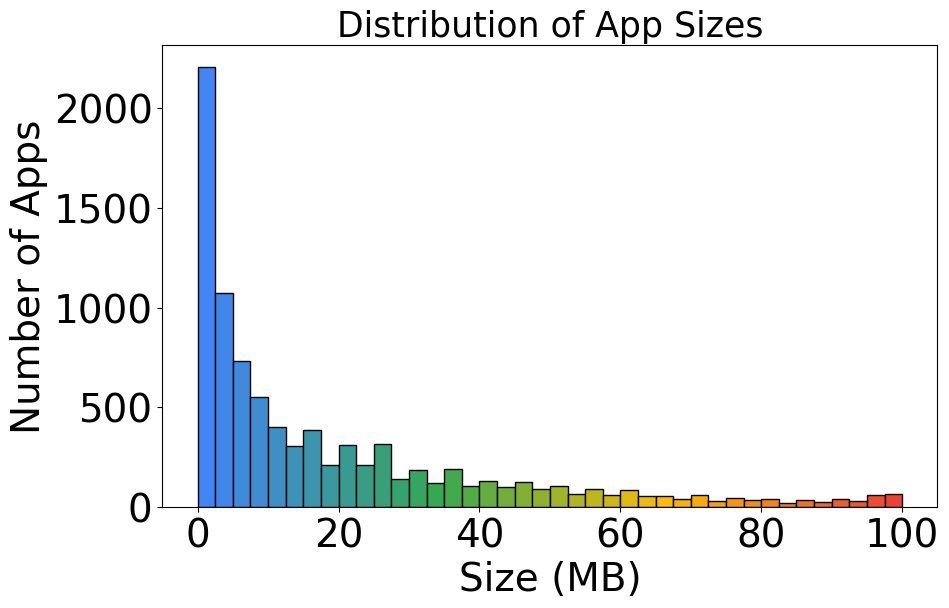

In [ ]:

sizes = df["Size"]

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(sizes, bins=40, edgecolor='black')

for i in range(len(patches)):
    patches[i].set_facecolor(google_gradient(i / (len(patches) - 1)))

plt.title("Distribution of App Sizes",fontsize=25)
plt.xlabel("Size (MB)",fontsize=28)
plt.ylabel("Number of Apps",fontsize=28)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.show()

<b><font color="green" size="3">1. Why did you pick the specific chart?</font></b><br>

<font color="#DAA520">A histogram was chosen to display the distribution of app sizes across defined intervals, making it easy to identify which size ranges have the highest number of apps.</font>

<b><font color="green" size="3">2. What is/are the insight(s) found from the chart?</font></b><br>

<font color="#DAA520">Most apps fall within the 0–10 MB range, indicating that developers prefer keeping app sizes small, likely to improve download rates and compatibility across devices.</font>

<b><font color="green" size="3">3. Will the gained insights help create a positive business impact?<br>
Are there any insights that lead to negative growth?</font></b><br>

<font color="#DAA520" size="3">
Yes, this insight supports the strategy of optimizing app sizes to attract more users, especially in regions with limited storage or slower internet. Larger apps may lead to negative growth due to lower download rates and higher uninstall chances.</font>

######**<font color="red" >Chart - 5</font>**

<b><font color="blue" size="3">Question no. 5  What percentage of Google Play Store apps are free versus paid?</font></b>

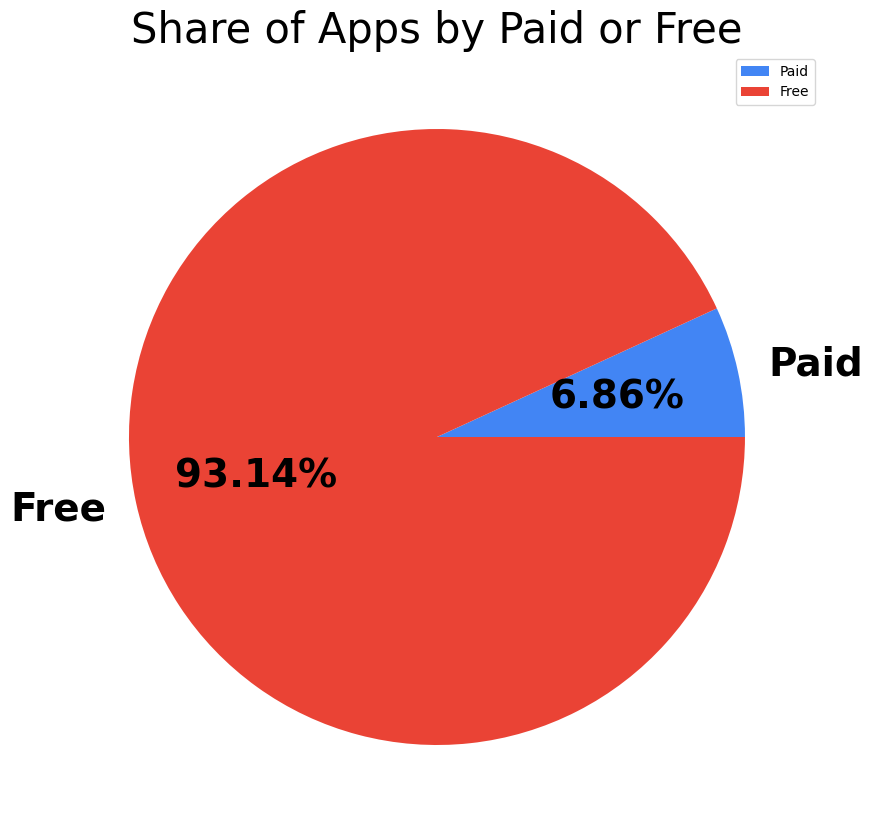

In [ ]:

type_counts = df["Type"].value_counts().sort_values()

types = list(type_counts.index)
total = len(types) - 1
colors = [google_gradient(i / total) for i in range(len(types))]

plt.figure(figsize=(10, 10))
plt.pie(type_counts, labels=types, colors=colors, autopct="%1.2f%%",
        startangle=0,textprops={'fontsize':28,'color':'black','fontweight':'bold'})
plt.title("Share of Apps by Paid or Free", fontsize=30)
plt.legend(loc="upper right",bbox_to_anchor=(1,1))
plt.show()

<b><font color="green" size="3">1. Why did you pick the specific chart?</font></b><br>

<font color="#DAA520">A pie chart was selected because it effectively highlights the distribution between free and paid apps, allowing for a quick visual comparison of their market share.</font>

<b><font color="green" size="3">2. What is/are the insight(s) found from the chart?</font></b><br>

<font color="#DAA520">The chart reveals that 93.12% of apps are free, while only 6.88% are paid, indicating a strong preference among developers and users for free apps.</font>

<b><font color="green" size="3">3. Will the gained insights help create a positive business impact?<br>
Are there any insights that lead to negative growth?</font></b><br>

<font color="#DAA520" size="3">
Yes, this chart helps app makers understand that most people prefer free apps. So, they can earn money by showing ads or offering extra features for a price (freemium model). Paid apps may not be downloaded as much unless they give something really special.</font>

######**<font color="red" >Chart - 6</font>**

<b><font color="blue" size="3">Question no. 6  How does the number of user reviews influence app ratings on the Google Play Store?</font></b>

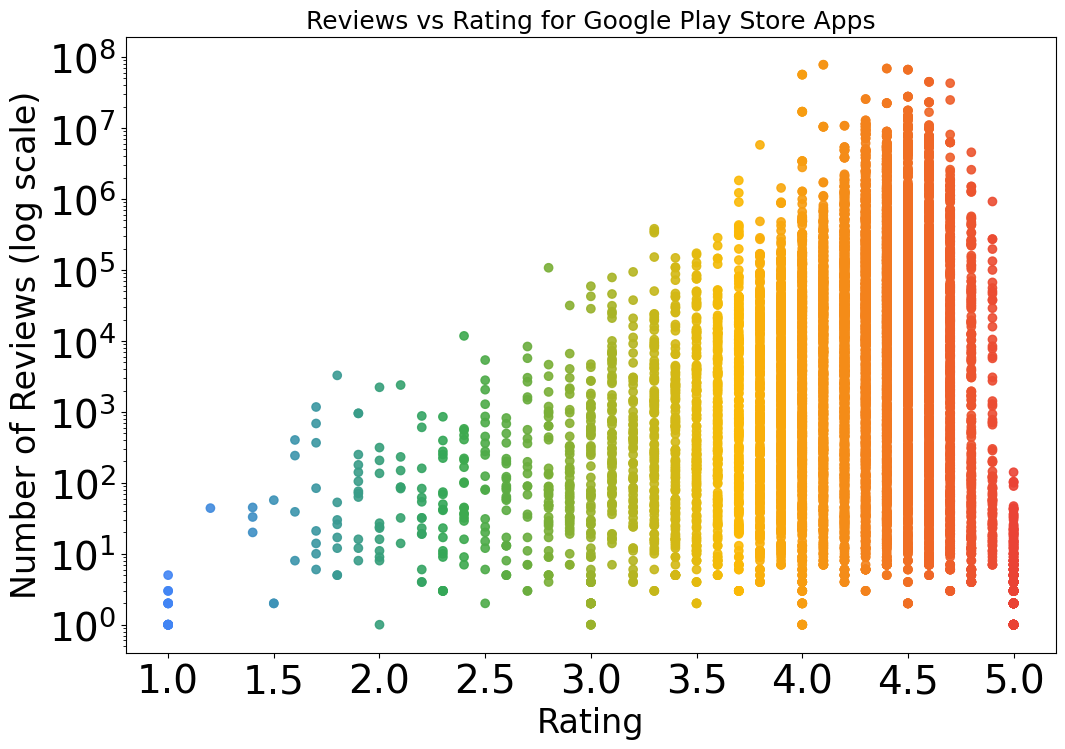

In [ ]:

ratings = df["Rating"]
reviews = df["Reviews"]

colours = google_gradient((ratings - ratings.min()) / (ratings.max() - ratings.min()))

plt.figure(figsize=(12, 8))
plt.scatter(ratings, reviews, c=colours, alpha=0.9)
plt.yscale("log")
plt.title("Reviews vs Rating for Google Play Store Apps", fontsize=18)
plt.xlabel("Rating", fontsize=24)
plt.ylabel("Number of Reviews (log scale)", fontsize=24)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.show()

<b><font color="green" size="3">1. Why did you pick the specific chart?</font></b><br>

<font color="#DAA520">A scatter plot was chosen to show the relationship between app ratings and the number of reviews, helping visualize how user feedback changes with app quality.</font>

<b><font color="green" size="3">2. What is/are the insight(s) found from the chart?</font></b><br>

<font color="#DAA520">Apps with ratings between 4.3 and 4.7 have the most reviews. Apps with low ratings (below 3) get very few reviews.</font>

<b><font color="green" size="3">3. Will the gained insights help create a positive business impact?<br>
Are there any insights that lead to negative growth?</font></b><br>

<font color="#DAA520" size="3">
Yes, Apps with higher ratings get more reviews, which helps them grow faster. So, developers should focus on making good-quality apps. If an app has low ratings, it may not grow, so improving the rating is very important.</font>

######**<font color="red" >Chart - 7</font>**

<b><font color="blue" size="3">Question no. 7 What is the relationship between an apps rating and the number of installs on the Google Play Store? </font></b>

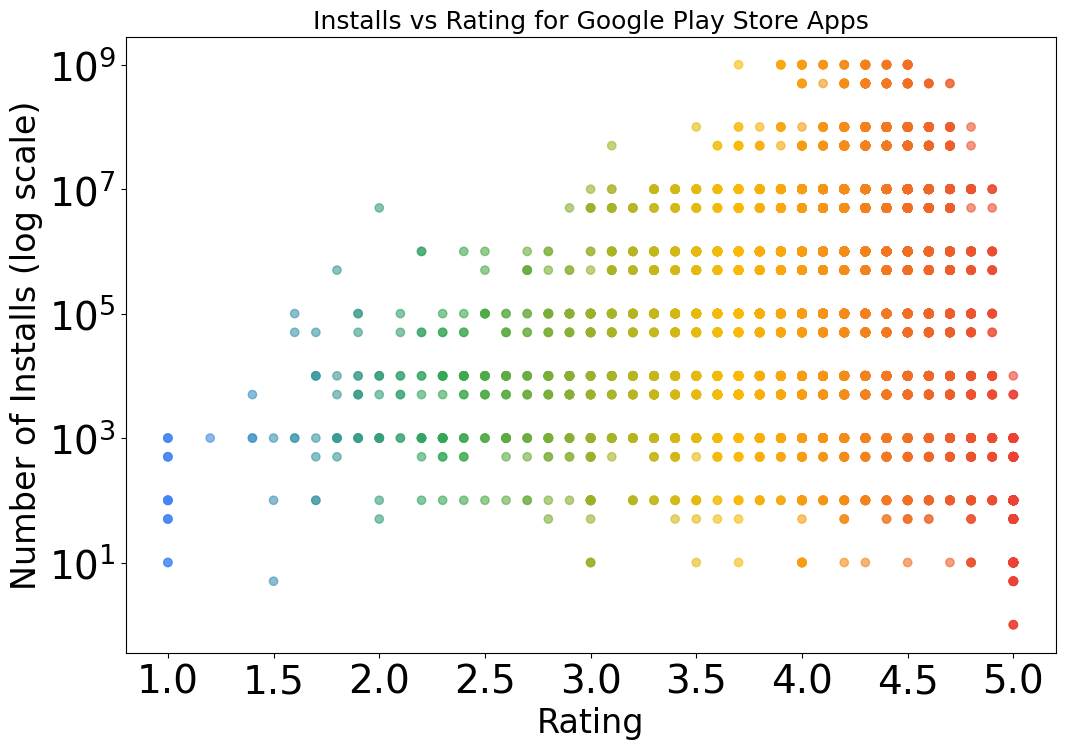

In [ ]:

ratings = df["Rating"]
installs = df["Installs"]

colours = google_gradient((ratings - ratings.min()) / (ratings.max() - ratings.min()))

plt.figure(figsize=(12, 8))
plt.scatter(ratings, installs, c=colours, alpha=0.6)
plt.yscale("log")
plt.title("Installs vs Rating for Google Play Store Apps", fontsize=18)
plt.xlabel("Rating", fontsize=24)
plt.ylabel("Number of Installs (log scale)", fontsize=24)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.show()

<b><font color="green" size="3">1. Why did you pick the specific chart?</font></b><br>

<font color="#DAA520" size="3">
I picked a scatter chart because it's a great way to show how two things are connected — here, how an app’s rating is related to how many times it’s been downloaded.
I also used a log scale so we can clearly see both small and big numbers of installs.
</font>

<b><font color="green" size="3">2. What is/are the insight(s) found from the chart?</font></b><br>

<font color="#DAA520" size="3">
Apps with higher ratings (above 4 stars) usually have more installs.
Apps with lower ratings (below 3 stars) tend to have fewer installs.
Most popular apps have ratings between 3.5 and 5 stars.
A few apps have lots of downloads even if their ratings are just average — maybe because of big brands or ads.
</font>

<b><font color="green" size="3">3. Will the gained insights help create a positive business impact?<br>
Are there any insights that lead to negative growth?</font></b><br>

<font color="#DAA520" size="3">
Yes,This tells app developers that keeping a high rating is super important if they want more people to download their app.
So, fixing bugs, adding good features, and making users happy can really help grow the app.
But,If your app has a low rating, it’s hard to get more users — and that can hurt your business in the long run.
</font>

######**<font color="red" >Chart - 8</font>**

<b><font color="blue" size="3">Question no. 8 How does the size of a Google Play Store app affect the number of installs? </font></b>

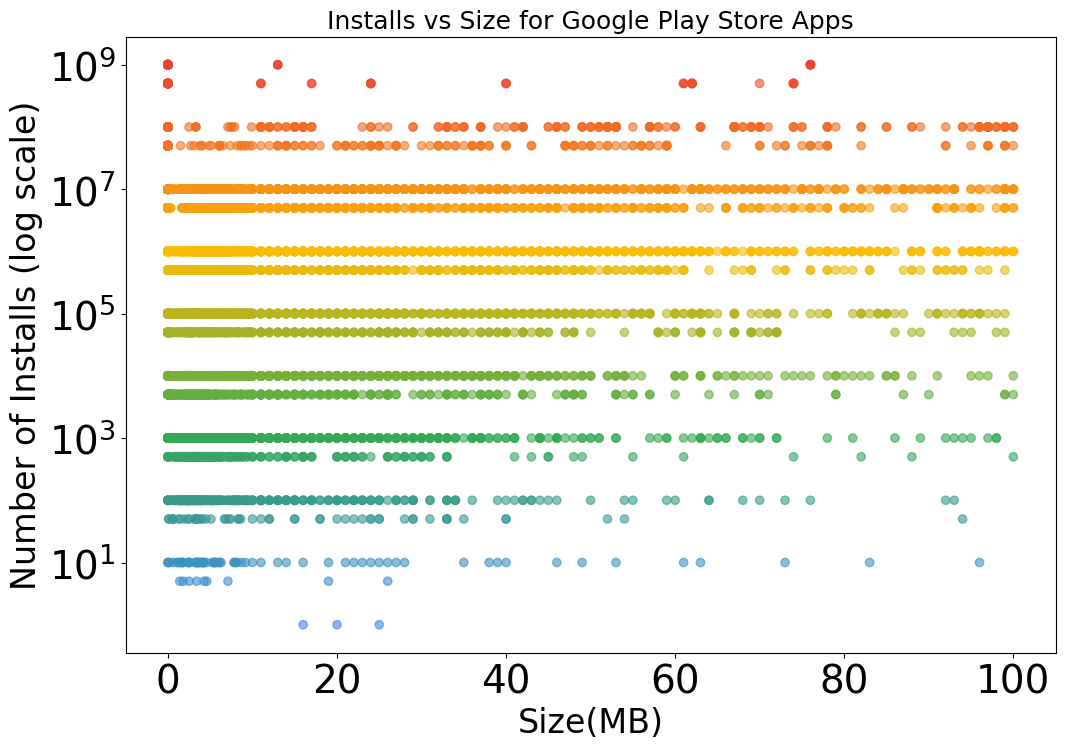

In [ ]:

sizes = df["Size"]
installs = df["Installs"]

inst_log   = np.log10(installs.replace(0, np.nan))
colours    = google_gradient( (inst_log - inst_log.min()) / (inst_log.max() - inst_log.min()) )

plt.figure(figsize=(12, 8))
plt.scatter(sizes, installs, c=colours, alpha=0.6)
plt.yscale("log")
plt.title("Installs vs Size for Google Play Store Apps", fontsize=18)
plt.xlabel("Size(MB)", fontsize=24)
plt.ylabel("Number of Installs (log scale)", fontsize=24)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.show()

<b><font color="green" size="3">1. Why did you pick the specific chart?</font></b><br>

<font color="#DAA520" size="3">
I chose a scatter chart because it clearly shows how app size (in MB) relates to the number of installs.
It helps visualize if smaller or larger apps are downloaded more.
Using a log scale on the y-axis makes it easier to compare apps with low vs. high install numbers.
</font>

<b><font color="green" size="3">2. What is/are the insight(s) found from the chart?</font></b><br>

<font color="#DAA520" size="3">
There’s no strong connection between app size and number of installs.
Both small and large apps can have high install counts.
However, most highly installed apps are between 0 to 40 MB, showing that users may prefer lightweight apps.
Very large apps (above 80 MB) are less commonly downloaded, possibly due to data limits or storage concerns.
</font>

<b><font color="green" size="3">3. Will the gained insights help create a positive business impact?<br>
Are there any insights that lead to negative growth?</font></b><br>

<font color="#DAA520" size="3">
Yes,Smaller apps are more likely to be downloaded, especially where internet or storage is limited.
But,If an app is too big, people may avoid it due to slow downloads or storage issues.
</font>

######**<font color="red" >Chart - 9</font>**

<b><font color="blue" size="3">Question no. 9  Which app categories have the highest and lowest user ratings?</font></b>

/tmp/ipython-input-36-281267861.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Category", y="Rating", order=cat_order, palette=colors,showfliers=False)


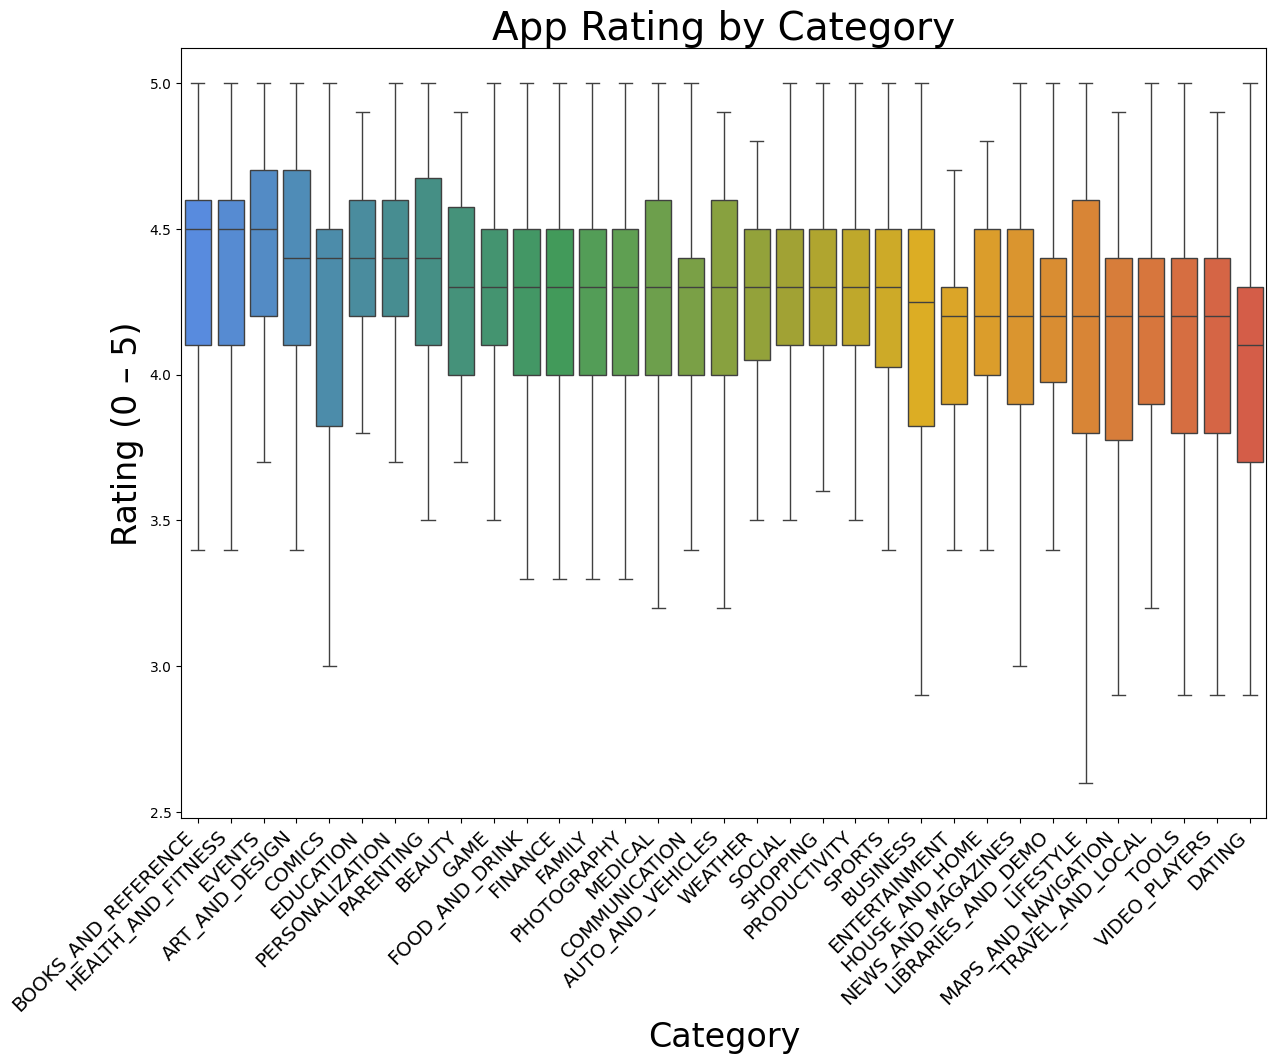

In [ ]:

cat_order = df.groupby("Category")["Rating"].median().sort_values(ascending=False).index
colors = [google_gradient(i / len(cat_order)) for i in range(len(cat_order))]

plt.figure(figsize=(14, 10))
sns.boxplot(data=df, x="Category", y="Rating", order=cat_order, palette=colors,showfliers=False)
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.title("App Rating by Category", fontsize=28)
plt.xlabel("Category", fontsize=24)
plt.ylabel("Rating (0 – 5)", fontsize=24)
plt.show()

<b><font color="green" size="3">1. Why did you pick the specific chart?</font></b><br>

<font color="#DAA520">A box-plot neatly shows each category’s median rating, spread, and outliers in one view, making it easy to compare many categories at once./font>

<b><font color="green" size="3">2. What is/are the insight(s) found from the chart?</font></b><br>

<font color="#DAA520">Categories like Education, Events, and Health & Fitness cluster around high medians (4.5) with tight spreads, whereas Tools,Video Players and Dating sit lower (3.8) and display wider, less consistent ratings.</font>

<b><font color="green" size="3">3. Will the gained insights help create a positive business impact?<br>
Are there any insights that lead to negative growth?</font></b><br>

<font color="#DAA520" size="3">
Yes,Categories with high ratings and low variation show that users appreciate good apps. So, launching a quality app in these categories builds trust easily.While categories with low ratings and high variation mean app quality is inconsistent. If your app isn't good enough here, users may ignore it and you could lose money.</font>

######**<font color="red" >Chart - 10</font>**

<b><font color="blue" size="3">Question no. 10  Which app categories have the highest and lowest user ratings?</font></b>

Index(['2010-05', '2011-01', '2011-03', '2011-04', '2011-05', '2011-06',
       '2011-07', '2011-09', '2011-10', '2011-12', '2012-01', '2012-02',
       '2012-04', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10',
       '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04',
       '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10',
       '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04',
       '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10',
       '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04',
       '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10',
       '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04',
       '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10',
       '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04',
       '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10',
       '2017-11', '2017-12', '2018-01', '2018-02', 

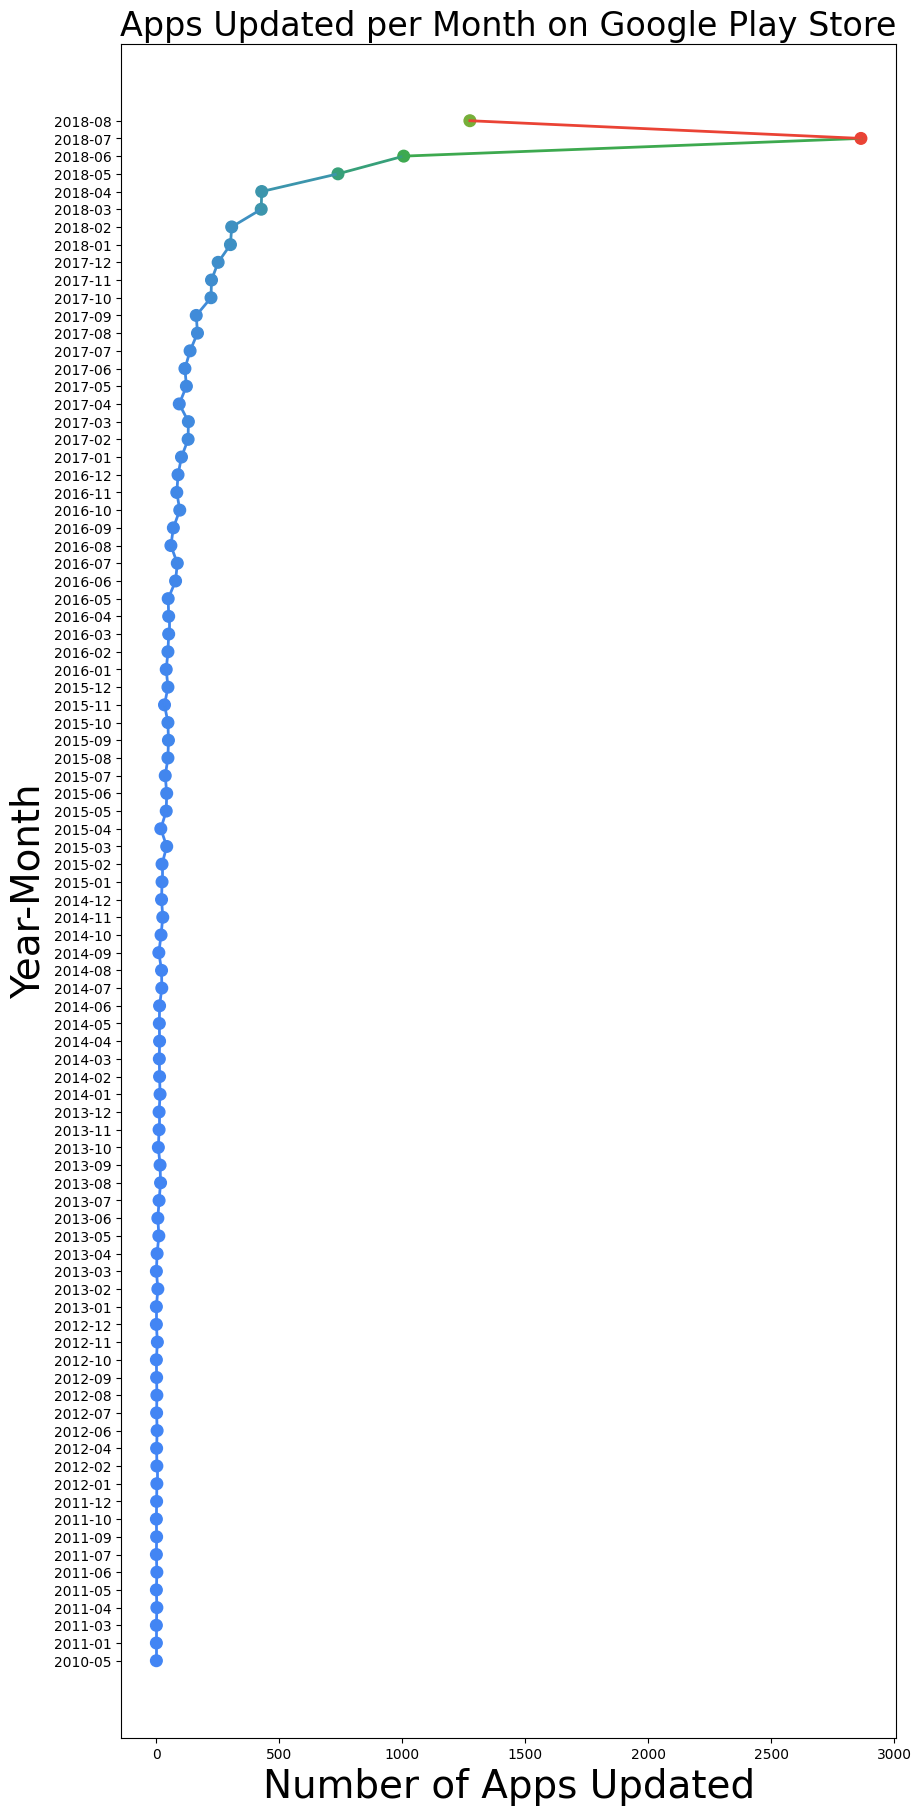

In [ ]:


# Count apps per month
monthly_counts = df["Last_Updated"].dt.to_period("M").value_counts().sort_index()

# Prepare X and Y
months = monthly_counts.index.astype(str)
print(months)
counts = monthly_counts.values

# Normalize counts for gradient left to right
norm = (counts - counts.min()) / (counts.max() - counts.min())
colors = [google_gradient(x) for x in norm]

# Plotting
plt.figure(figsize=(10, 22))
for i in range(len(counts) - 1):
    plt.plot([counts[i], counts[i + 1]], [months[i], months[i + 1]],
             color=google_gradient(norm[i]), linewidth=2)
plt.scatter(counts, months, c=colors, s=70)

plt.xlabel("Number of Apps Updated", fontsize=28)
plt.ylabel("Year-Month", fontsize=28)
plt.title("Apps Updated per Month on Google Play Store", fontsize=24)
plt.show()

<b><font color="green" size="3">1. Why did you pick the specific chart?</font></b><br>

<font color="#DAA520" size="3">
I used this line and scatter(dot) chart to visualize how many apps were updated each month on the Google Play Store over time.
This chart clearly shows trends in app update activity — whether it’s increasing, stable, or decreasing.
</font>

<b><font color="green" size="3">2. What is/are the insight(s) found from the chart?</font></b><br>

<font color="#DAA520" size="3">
In the early years (before 2014), very few apps were updated.
From 2014 to 2017, app updates increased a lot — developers were very active.
After 2018, the number of updates is still high but growing slowly or staying flat.
</font>

<b><font color="green" size="3">3. Will the gained insights help create a positive business impact?<br>
Are there any insights that lead to negative growth?</font></b><br>

<font color="#DAA520" size="3">
It shows the best time periods when the app market was most active.
Companies can plan to launch or update apps when developer activity is high.
But if updates slow down, it may mean the market is too full or slowing down.
</font>

######**<font color="red" >Chart - 11</font>**

<b><font color="blue" size="3">Question no. 11  How do app ratings and user reviews affect the number of installs?</font></b>

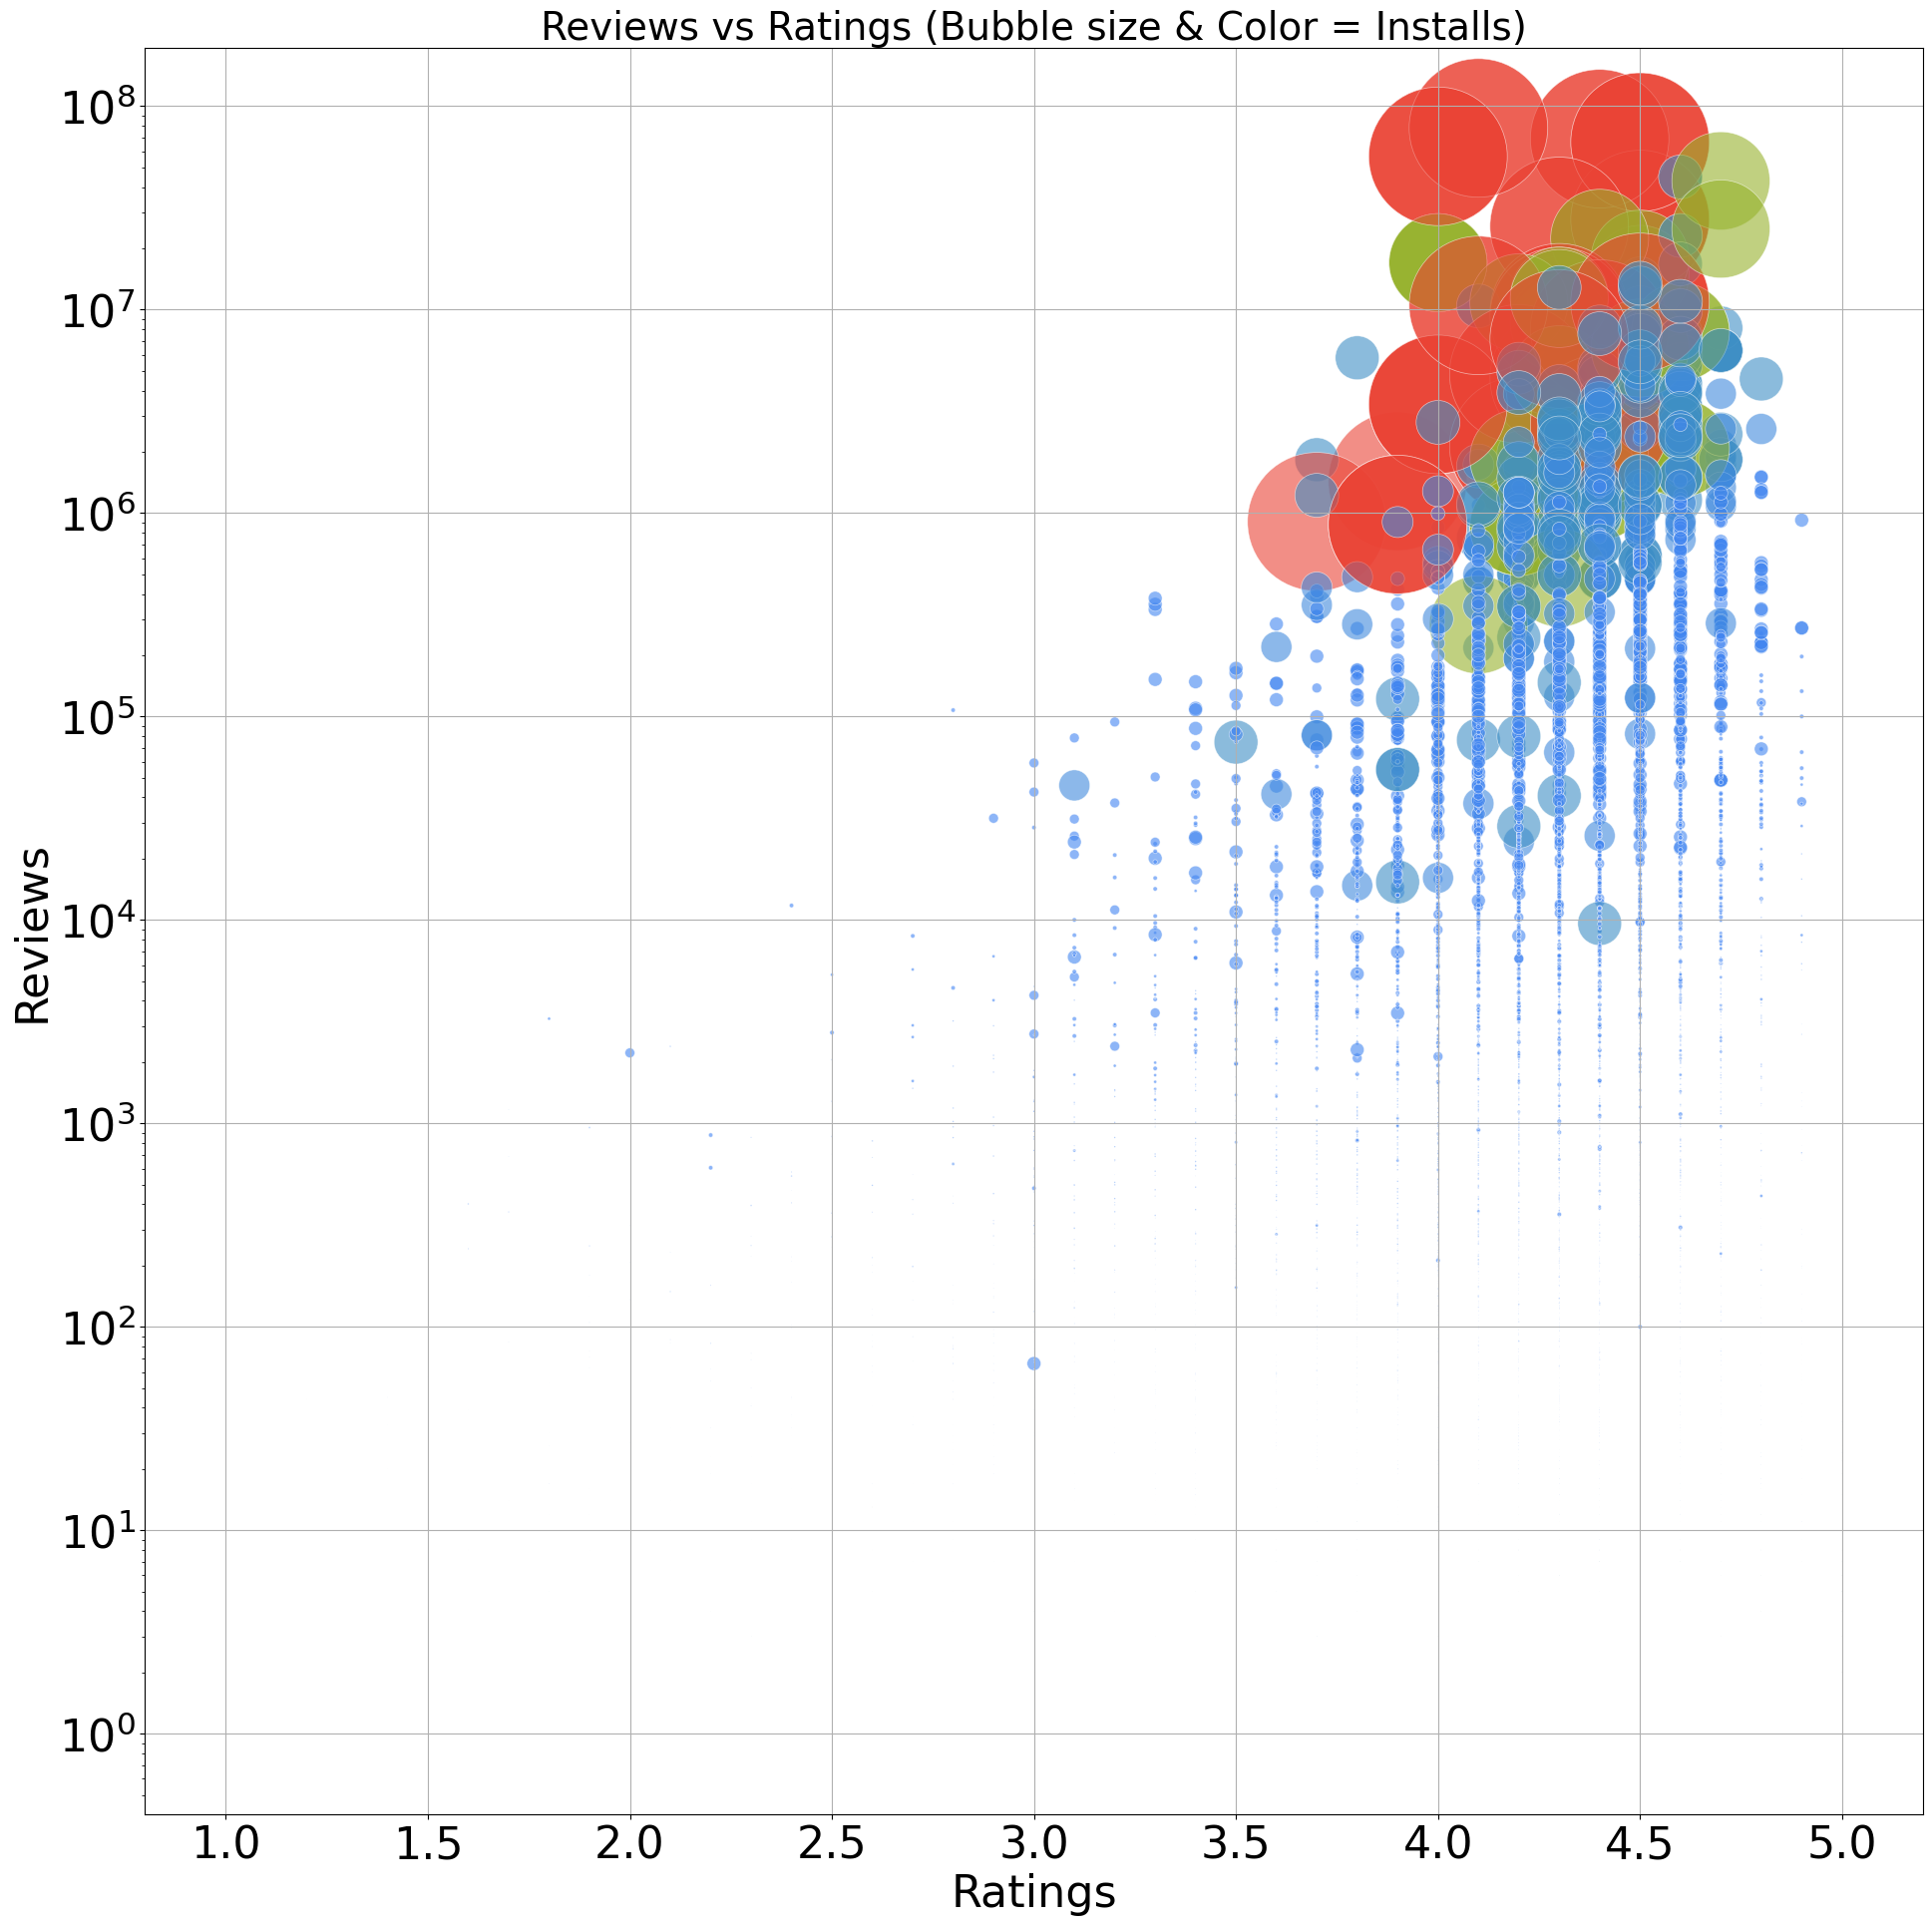

In [ ]:
plt.figure(figsize=(23, 23))
plt.scatter(
    ratings,
    reviews,
    s=installs / 100000,
    alpha=0.6,
    c=installs,
    cmap=google_gradient,
    edgecolors='w',
    linewidth=0.5
)

plt.xlabel('Ratings', fontsize=32)
plt.xticks(fontsize=32)
plt.yscale('log')
plt.ylabel('Reviews', fontsize=32)
plt.yticks(fontsize=32)
plt.title('Reviews vs Ratings (Bubble size & Color = Installs)', fontsize=28)
plt.grid()
plt.show()

<b><font color="green" size="3">1. Why did you pick the specific chart?</font></b><br>

<font color="#DAA520" size="3">
A bubble chart effectively shows the relationship between ratings and reviews, while also using bubble size to represent installs, offering a clear 3D insight in 2D space.
</font>

<b><font color="green" size="3">2. What is/are the insight(s) found from the chart?</font></b><br>

<font color="#DAA520" size="3">
Most apps cluster between 4.0–4.7 ratings with a wide range of reviews, and the largest bubbles (high installs) also lie in this rating range, showing popular apps tend to have high ratings.
</font>

<b><font color="green" size="3">3. Will the gained insights help create a positive business impact?<br>
Are there any insights that lead to negative growth?</font></b><br>

<font color="#DAA520" size="3">
Yes, focusing on high-quality apps (ratings above 4.0) can drive installs and reviews. Apps below 3.5 ratings rarely achieve high installs, showing poor user experience leads to negative growth.
</font>

######**<font color="red" >Chart - 12</font>**

<b><font color="blue" size="3">Question no. 12  Which app categories have the highest and lowest average ratings?</font></b>

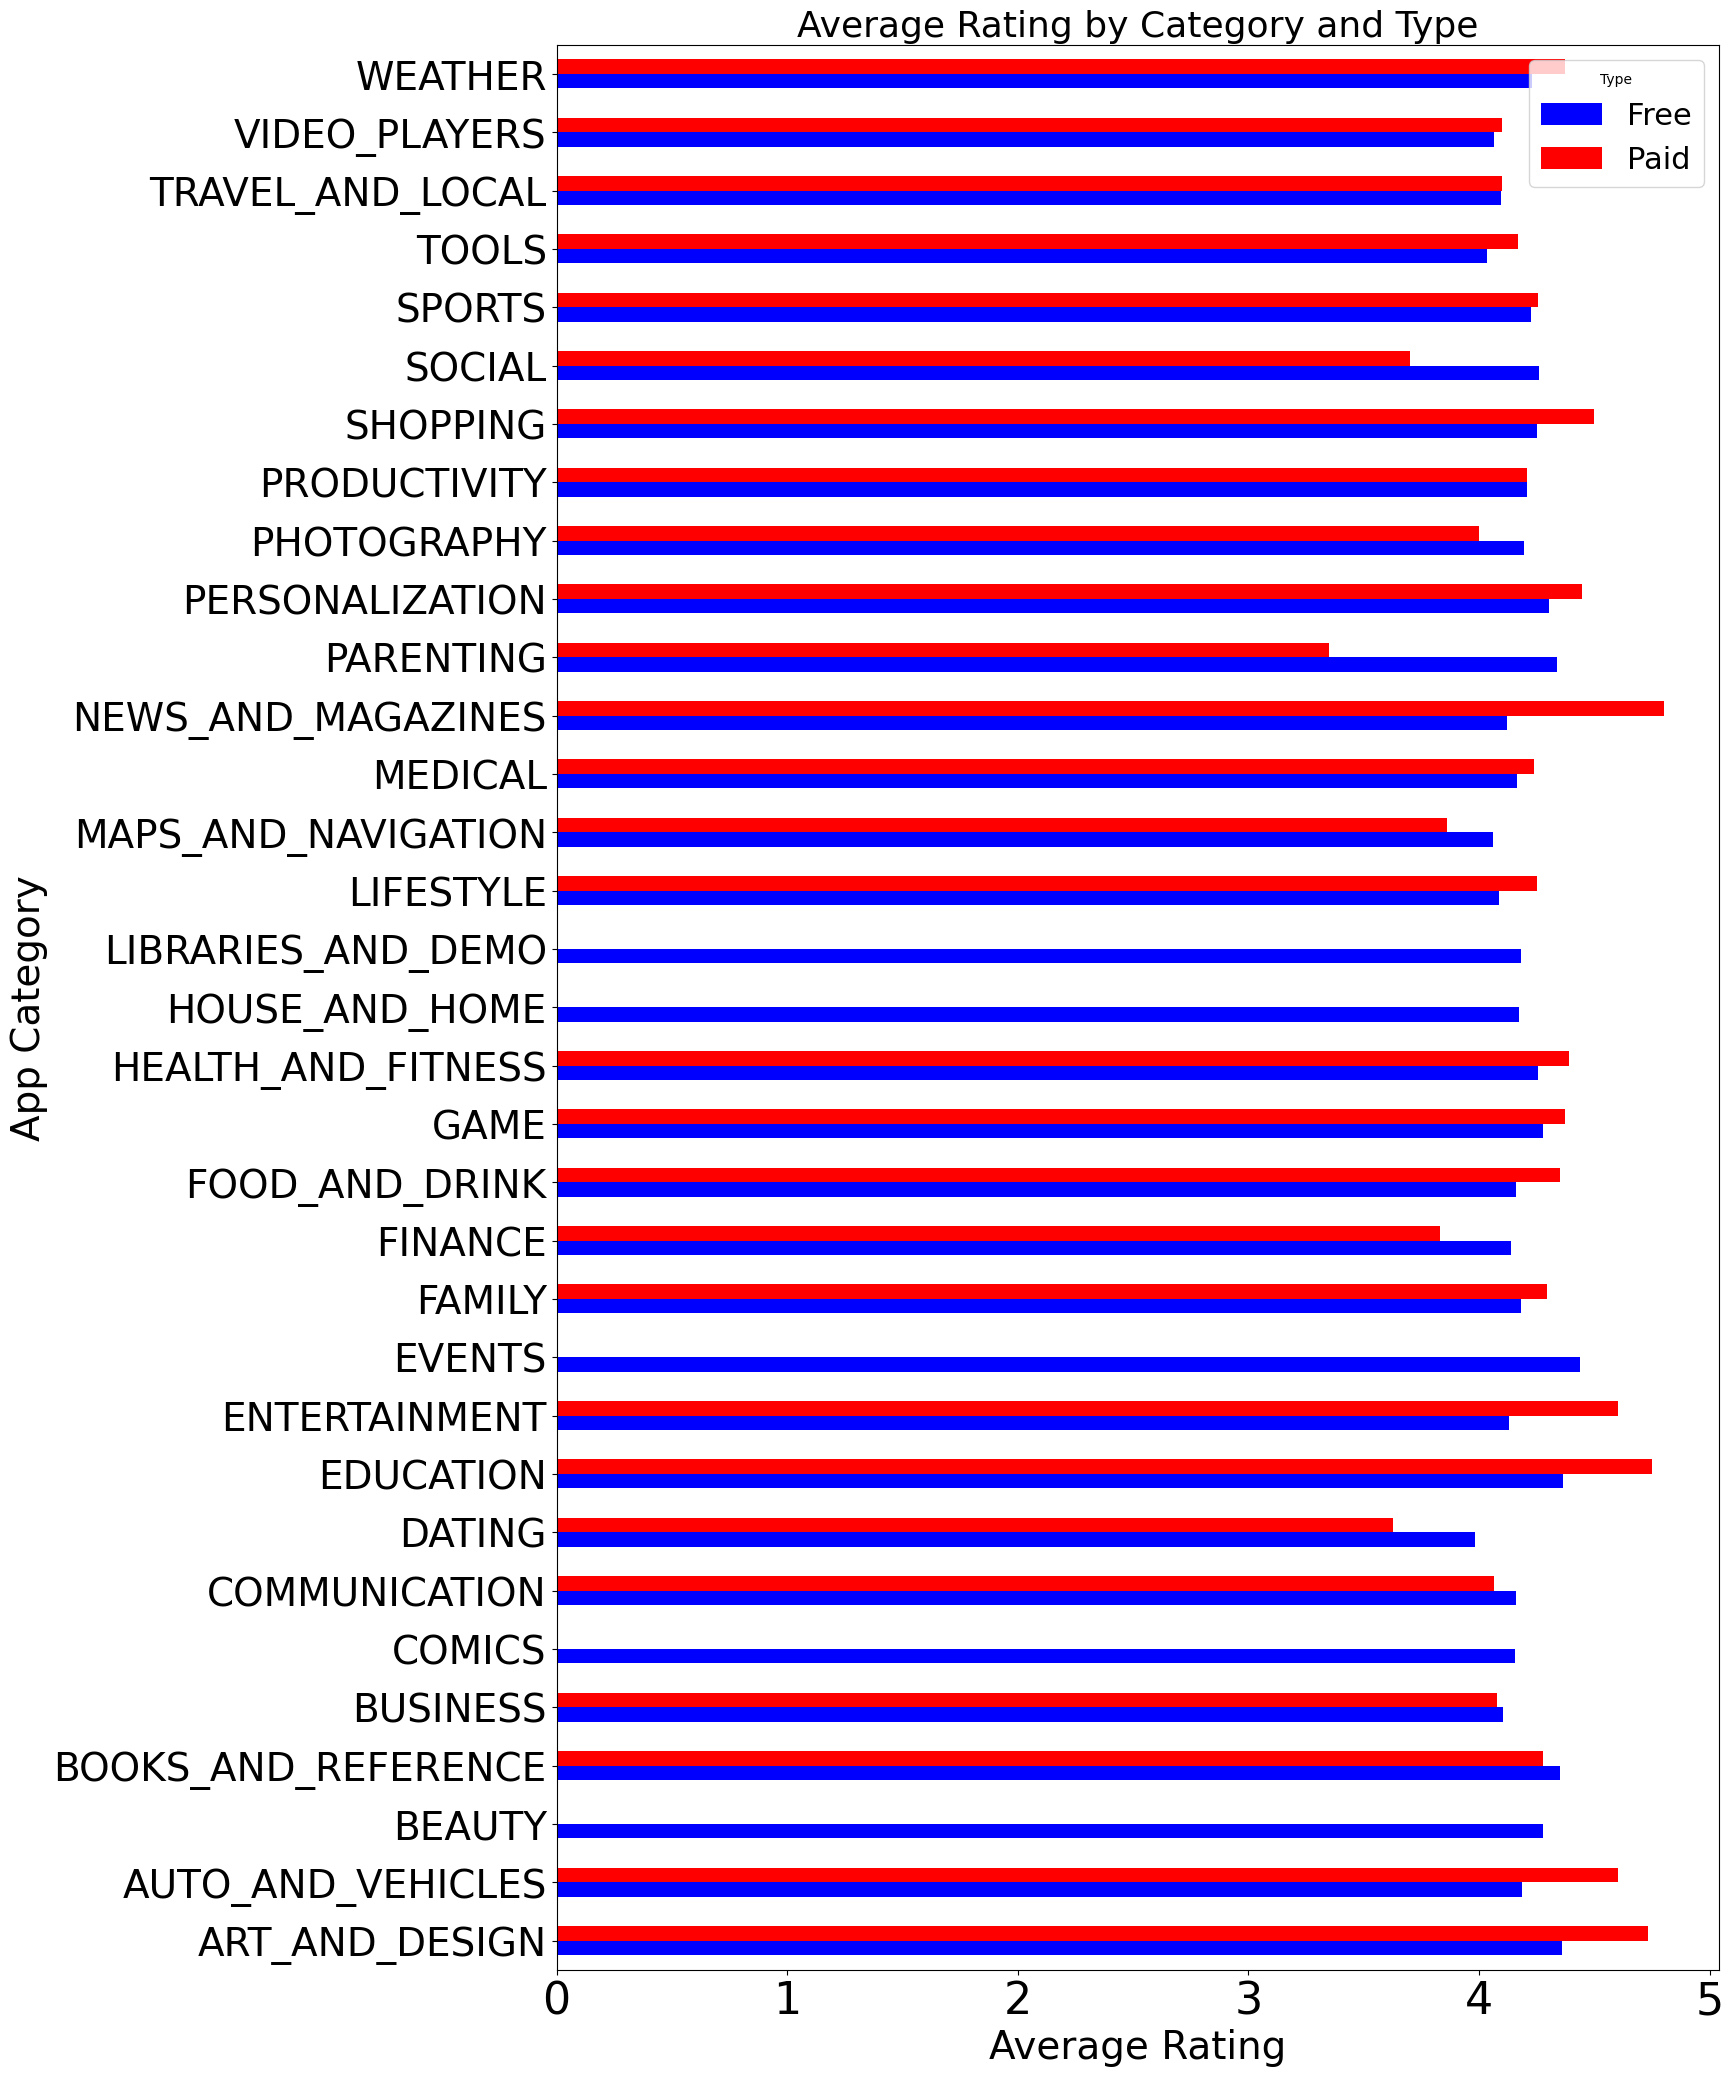

In [ ]:
grouped_data = df.groupby(['Category', 'Type'])['Rating'].mean().unstack()

fig, ax = plt.subplots(figsize=(15, 25))

grouped_data.plot(kind='barh', ax=ax,color=['blue', 'red'])

plt.xticks( fontsize=32)
plt.yticks( fontsize=28)
plt.xlabel('Average Rating', fontsize=28)
plt.ylabel('App Category', fontsize=28)
plt.title('Average Rating by Category and Type', fontsize=26)
plt.legend(title='Type', fontsize=22)
plt.show()

<b><font color="green" size="3">1. Why did you pick the specific chart?</font></b><br>

<font color="#DAA520" size="3">
I used a horizontal bar chart because it’s easy to read and compare ratings for different app categories. Grouping the bars by Free and Paid apps helps us quickly see which type is rated better in each category.
</font>

<b><font color="green" size="3">2. What is/are the insight(s) found from the chart?</font></b><br>

<font color="#DAA520" size="3">
Some categories like Education or Health have high average ratings, especially for Paid apps.
Others like Dating or Tools have lower ratings overall.
Paid apps usually have better ratings than Free apps, which may mean people are happier when they pay for apps.
</font>

<b><font color="green" size="3">3. Will the gained insights help create a positive business impact?<br>
Are there any insights that lead to negative growth?</font></b><br>

<font color="#DAA520" size="3">
App makers can focus on high-rated categories where users are more satisfied — especially with Paid apps.
They can also try to improve apps in low-rated categories to make them better.
If businesses ignore the low ratings in some categories, they might waste time and money or lose users.
</font>

######**<font color="red" >Chart - 13</font>**

<b><font color="blue" size="3">Question no. 13  How do average app installs vary by category and by app type (Free vs. Paid) on the Google Play Store?</font></b>

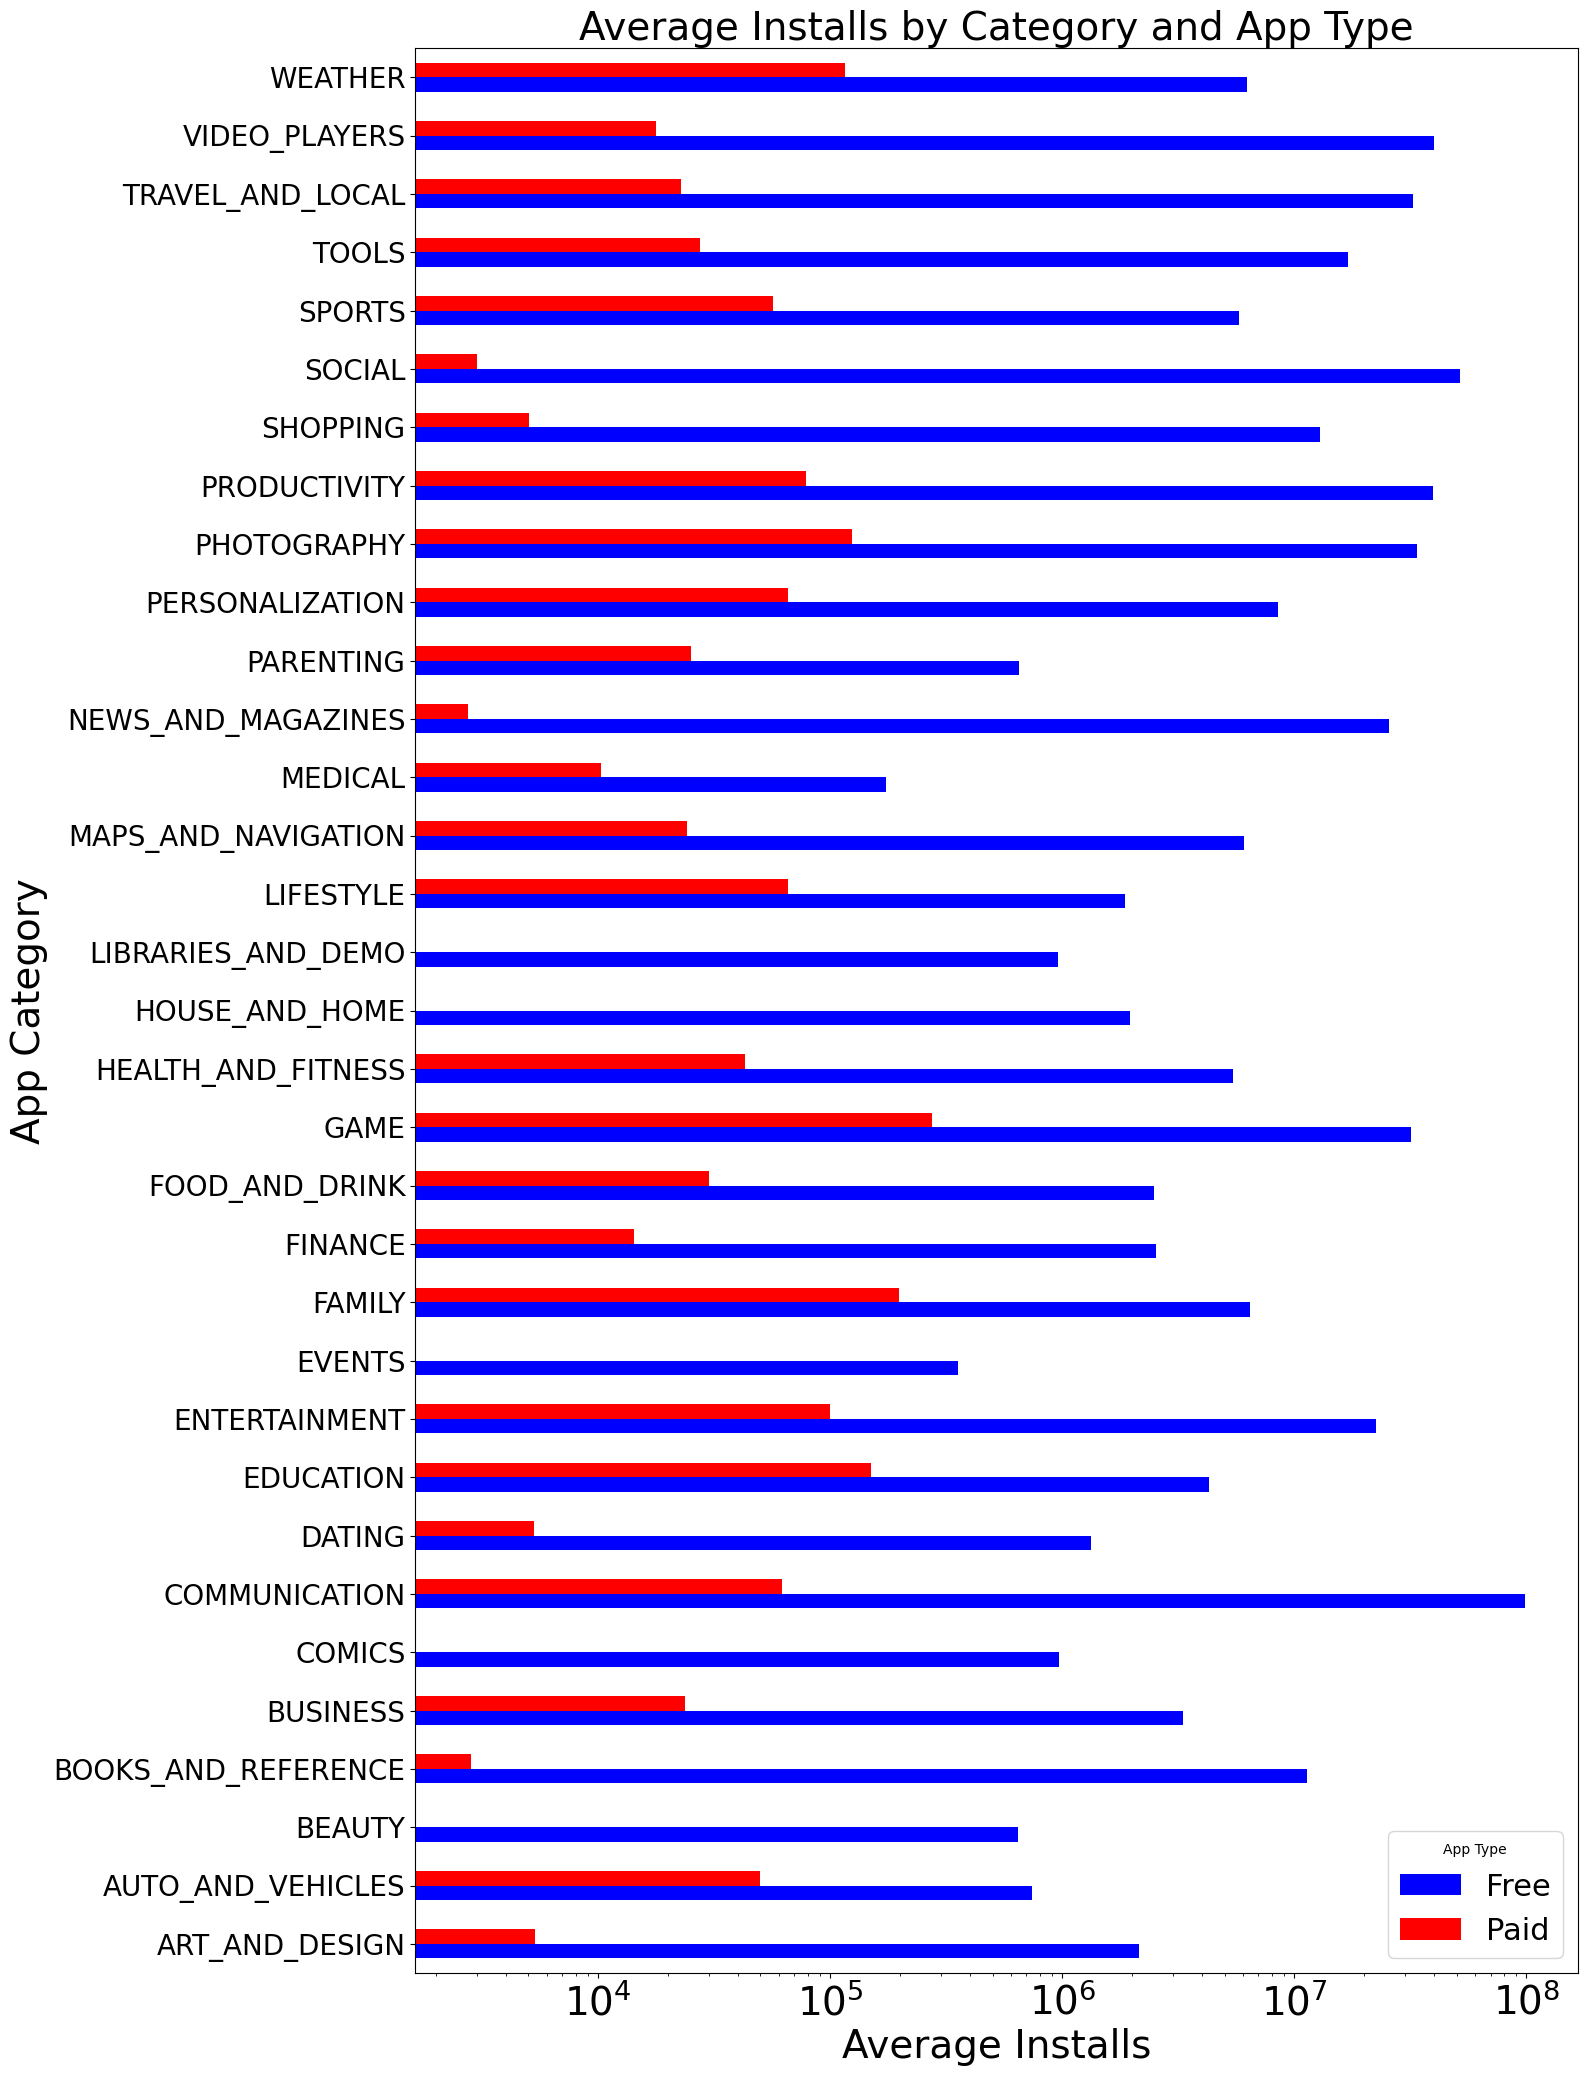

In [ ]:
grouped = df.groupby(['Category', 'Type'])['Installs'].mean().unstack()

fig, ax = plt.subplots(figsize=(15, 25))
grouped.plot(kind='barh', ax=ax,color=['blue', 'red'])
ax.set_xscale('log')
plt.title('Average Installs by Category and App Type', fontsize=28)
plt.xlabel('Average Installs', fontsize=28)
plt.ylabel('App Category', fontsize=28)
plt.xticks(rotation=0, fontsize=28)
plt.yticks(rotation=0, fontsize=20)
plt.legend(title='App Type', fontsize=22)
plt.show()

<b><font color="green" size="3">1. Why did you pick the specific chart?</font></b><br>

<font color="#DAA520" size="3">
I picked this chart because it clearly shows
Which app categories get the most and least installs.
The difference between Free and Paid apps in each category.
The horizontal bars make the names easier to read and compare.
</font>

<b><font color="green" size="3">2. What is/are the insight(s) found from the chart?</font></b><br>

<font color="#DAA520" size="3">
Free apps are installed much more than Paid apps in almost every category.
Categories like Communication, Social, and Video Players have the highest installs.
Paid apps get very few installs, no matter the category.
Some categories have very low installs overall.
</font>

<b><font color="green" size="3">3. Will the gained insights help create a positive business impact?<br>
Are there any insights that lead to negative growth?</font></b><br>

<font color="#DAA520" size="3">
Yes,Developers should focus on Free apps in popular categories to reach more users.
The chart helps decide which types of apps to build or promote.
It can save money by avoiding low-performing or low-interest areas.
But,Making Paid apps in unpopular categories may lead to poor performance and money loss.
</font>

######**<font color="red" >Chart - 14</font>**

<b><font color="blue" size="3">Question no. 14  </font></b>

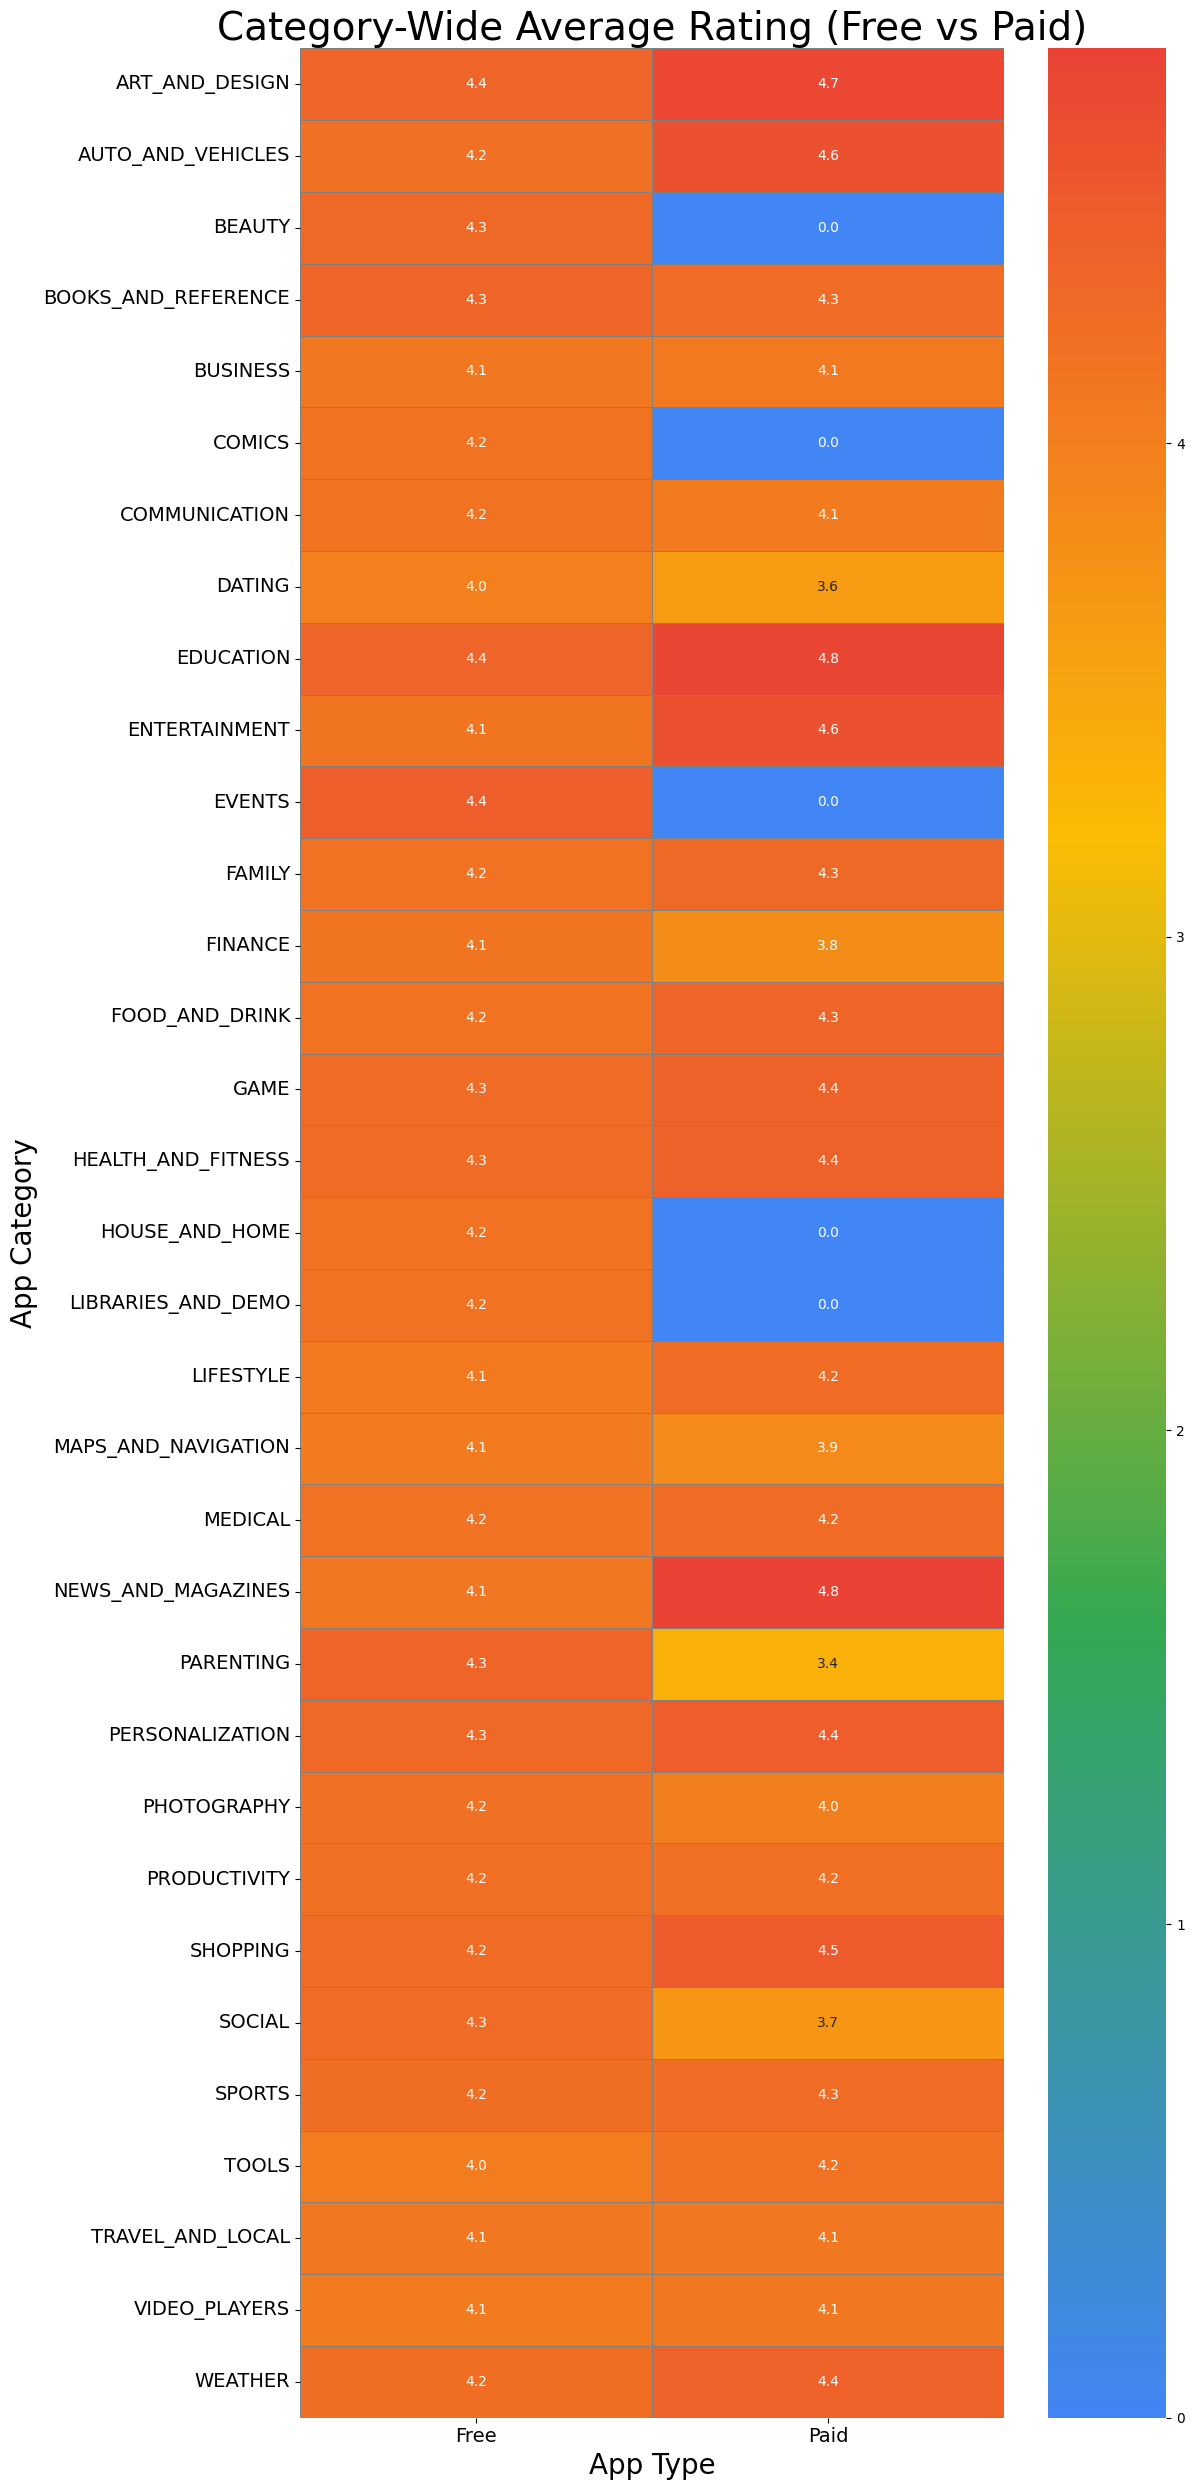

In [ ]:
pivot_table = df.pivot_table(values='Rating', index='Category', columns='Type', aggfunc='mean')
pivot_table = pivot_table.fillna(0)
#print(pivot_table)

plt.figure(figsize=(12, 25))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap=google_gradient, linewidths=0.5, linecolor='gray')
plt.title('Category-Wide Average Rating (Free vs Paid)', fontsize=28)
plt.xlabel('App Type', fontsize=20)
plt.ylabel('App Category', fontsize=20)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.tight_layout()
plt.show()

<b><font color="green" size="3">1. Why did you pick the specific chart?</font></b><br>

<font color="#DAA520" size="3">
I chose a heatmap with a pivot table because
It clearly shows the average rating differences between Free and Paid apps across all categories.
The color gradients help visually highlight where ratings are higher or lower.
It’s an effective way to compare two dimensions (app type and category) in one compact view.
</font>

<b><font color="green" size="3">2. What is/are the insight(s) found from the chart?</font></b><br>

<font color="#DAA520" size="3">
In most categories, Paid apps have higher average ratings than Free apps (e.g., Education, Photography, Medical).
Some categories show low ratings for Paid apps, like Beauty, Comics, and Parenting.
Free apps have fairly consistent ratings around 4.1–4.3, but Paid apps vary more, indicating user expectations may be higher for paid content.
</font>

<b><font color="green" size="3">3. Will the gained insights help create a positive business impact?<br>
Are there any insights that lead to negative growth?</font></b><br>

<font color="#DAA520" size="3">
Yes, these insights can help businesses grow by showing which categories (like Education and Photography) are good for making paid apps because users like them.
But there are also warnings—some paid apps (like in Beauty or Comics) get low ratings, which means users aren’t happy, and that can hurt business if not improved.
</font>

######**<font color="red" >Chart - 15</font>**

<b><font color="blue" size="3">Question no. 15  How are numerical features of apps such as Rating, Reviews, Size, Installs, and Price are correlated with each other?</font></b>

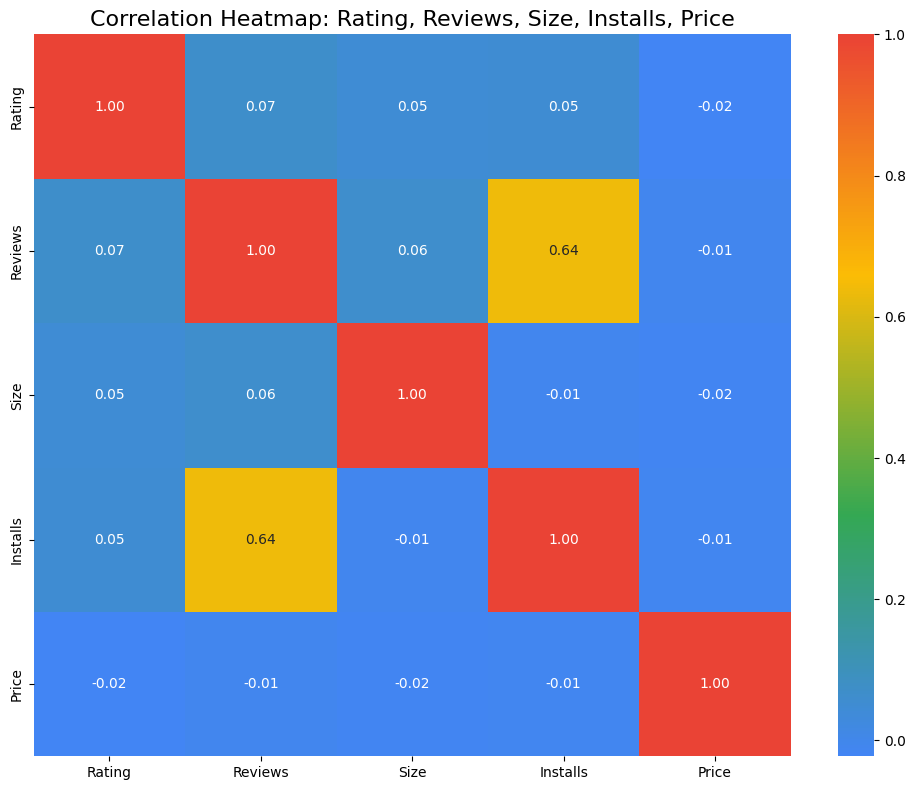

In [ ]:

corr_df = df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']]

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap=google_gradient, fmt='.2f')
plt.title('Correlation Heatmap: Rating, Reviews, Size, Installs, Price', fontsize=16)
plt.tight_layout()
plt.show()

<b><font color="green" size="3">1. Why did you pick the specific chart?</font></b><br>

<font color="#DAA520" size="3">
I used a correlation heatmap because it visually shows how strongly numerical features like Rating, Reviews, Size, Installs, and Price are related to each other.
The color gradients and correlation values make it easy to identify positive, negative, or no correlations at a glance.
</font>

<b><font color="green" size="3">2. What is/are the insight(s) found from the chart?</font></b><br>

<font color="#DAA520" size="3">
Installs and Reviews show a strong positive correlation (0.64),it means Apps with more installs tend to receive more reviews.
Rating has very weak correlation with all other features,it means Ratings are mostly independent.
Price has no meaningful correlation with Installs or Ratings, it means Paid apps are not necessarily better rated or downloaded.And
Size shows no strong correlation with any feature.
</font>

<b><font color="green" size="3">3. Will the gained insights help create a positive business impact?<br>
Are there any insights that lead to negative growth?</font></b><br>

<font color="#DAA520" size="3">
Yes,Focus on increasing installs, which in turn increases reviews (social proof).
Avoid assuming that app size or price affects user ratings — focus more on content and quality.
Understand that pricing alone won't drive more installs or higher ratings.
But, if a developer assumes that making an app larger (in size) or more expensive will improve performance, it could hurt growth, because the data shows no correlation between these factors and ratings or installs.
</font>

######**<font color="red" >5.  Conclusion</font>**

1. The app market is highly saturated in categories like "FAMILY" and "GAME", while categories like "BEAUTY" offer potential for growth due to lower competition.

2. Most Google Play Store apps receive high user ratings (4.0–5.0), which builds trust and boosts downloads.While apps with ratings below 3.0 need improvement to avoid losing users and harming business growth.

3. The chart highlights that a vast majority of apps are rated "Everyone," reflecting a strategic focus on universal accessibility, which helps maximize market reach and supports strong business growth, while niche categories may need tailored marketing to succeed.

4. The analysis shows that most Google Play Store apps are lightweight (under 10 MB), highlighting developers’ focus on performance and accessibility, which positively impacts user adoption and overall market reach.

5. Most Play Store apps are free, so developers should make money using ads or extra features.While paid apps need to be very useful or unique to get more downloads.

6. Apps with high ratings get more reviews and become more popular. To make the app grow, developers should make sure the app is good and users are happy.

7. Apps with higher ratings tend to get more installs, showing a clear link between user satisfaction and popularity.
To grow successfully, app developers should focus on improving ratings through better features and user experience.

8. App size doesn't strongly affect installs, but smaller apps are generally preferred.
Keeping apps lightweight can help attract more users and improve downloads.

9. Categories like Education, Events, and Health & Fitness have high, consistent ratings—ideal for launching trusted apps. But categories like Tools, Video Players, and Dating have lower, unstable ratings, so only high-quality apps succeed there.

10. The Google Play Store saw a rapid increase in app updates from 2014 to 2017, showing strong developer activity and growth.
After 2018, updates slowed down, suggesting the market may be stabilizing or becoming saturated — a sign for businesses to focus on quality and smart timing.

11. Apps with high ratings (above 4.0) are more likely to get more installs and reviews, showing that quality leads to popularity.

12. Paid apps usually have higher average ratings than free apps, showing that users are more satisfied with apps they pay for.
Focusing on high-rated categories like Education and Health can help businesses build better apps and improve user trust.


13. Free apps receive far more installs than paid apps across all categories, especially in popular ones like Communication and Social. Focusing on free apps in high-demand categories is the best strategy to reach more users and grow effectively.

14. Paid apps are rated higher in valuable categories like Education and Photography, making them good for monetization.
But in low-rated categories like Beauty or Comics, paid apps may harm business if not improved.

15. There is a strong positive relationship between app Installs and Reviews, but other features like Rating, Price, and Size show little to no correlation with each other. This means user ratings are mostly independent of how much an app costs or how big it is.